# Preparar el problema

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import datetime

## Descargar DataSet

In [2]:
dataset = pd.read_csv('/home/user/machinelearning/imida/data/AL41.csv', sep=';')
print(dataset.shape)
dataset.head(3)

(9872, 25)


CODEST       FECHA VVMED VVMAX RVIENTO DVMED TMIN  TMAX   TMED TMINABS  ...  \
0   AL41  01/01/1994   NaN   NaN  121,68   NaN  5,9  19,1  12,87     5,9  ...   
1   AL41  02/01/1994   NaN   NaN  104,76   NaN  2,9  20,8  11,75     2,9  ...   
2   AL41  03/01/1994   NaN   NaN   94,32   NaN  2,8  19,4  10,56     2,8  ...   

  HRMAXABS RADMED RADMAX HSOL PREC HORAS0 HORAS7 DEWPT  DPV   ETO_PM_FAO  
0     86,7    NaN    NaN  NaN    0    0.0    3.0   NaN  NaN  2,928228186  
1     84,5    NaN    NaN  NaN    0    0.0    9.0   NaN  NaN  2,928228186  
2     92,1    NaN    NaN  NaN    0    0.0    8.0   NaN  NaN  2,928228186  

[3 rows x 25 columns]

# Analizar datos

## Comprobar tipos

Solo hay 3 floats, el resto son objects. Esto se debe a que el que puso los datos en el csv lo hizo con comas :(

In [3]:
dataset.dtypes

CODEST         object
FECHA          object
VVMED          object
VVMAX          object
RVIENTO        object
DVMED          object
TMIN           object
TMAX           object
TMED           object
TMINABS        object
TMAXABS        object
HRMIN          object
HRMAX          object
HRMED          object
HRMINABS       object
HRMAXABS       object
RADMED         object
RADMAX         object
HSOL          float64
PREC           object
HORAS0        float64
HORAS7        float64
DEWPT          object
DPV            object
ETO_PM_FAO     object
dtype: object

Cambiamos las comas por puntos

In [4]:
dataset.replace(',', '.', regex=True, inplace=True)
dataset.head(5)


CODEST       FECHA VVMED VVMAX RVIENTO DVMED  TMIN  TMAX   TMED TMINABS  \
0   AL41  01/01/1994   NaN   NaN  121.68   NaN   5.9  19.1  12.87     5.9   
1   AL41  02/01/1994   NaN   NaN  104.76   NaN   2.9  20.8  11.75     2.9   
2   AL41  03/01/1994   NaN   NaN   94.32   NaN   2.8  19.4  10.56     2.8   
3   AL41  04/01/1994   NaN   NaN  153.36   NaN   8.3  15.6   12.2     8.3   
4   AL41  05/01/1994   NaN   NaN  151.92   NaN  -0.4  16.1   8.55    -0.4   

   ... HRMAXABS RADMED RADMAX HSOL PREC HORAS0 HORAS7 DEWPT  DPV   ETO_PM_FAO  
0  ...     86.7    NaN    NaN  NaN    0    0.0    3.0   NaN  NaN  2.928228186  
1  ...     84.5    NaN    NaN  NaN    0    0.0    9.0   NaN  NaN  2.928228186  
2  ...     92.1    NaN    NaN  NaN    0    0.0    8.0   NaN  NaN  2.928228186  
3  ...     78.6    NaN    NaN  NaN    0    0.0    0.0   NaN  NaN  2.928228186  
4  ...     88.8    NaN    NaN  NaN    0    3.0    8.0   NaN  NaN  2.928228186  

[5 rows x 25 columns]

Cambiar a floats

In [5]:
dataset = dataset.astype(str)   #Pasamos todo a String
for variable in dataset:
    for x in dataset[variable]:
        if('.' in x):   #Sería mejor una expresión regular del estilo [0-9]*[.][0-9]+
            #Si encontramos una variable con un punto, significa que es un float, por lo que lo pasamos a float
            dataset[variable] = dataset[variable].astype(float)
            break   #Con detectar una nos vale para cambiar toda la columna

Cambiar datetime

In [6]:
dataset['FECHA'] = pd.to_datetime(dataset['FECHA'], format="%d/%m/%Y")

Ya tenemos los datos como floats

In [7]:
dataset.dtypes

CODEST                object
FECHA         datetime64[ns]
VVMED                float64
VVMAX                float64
RVIENTO              float64
DVMED                float64
TMIN                 float64
TMAX                 float64
TMED                 float64
TMINABS              float64
TMAXABS              float64
HRMIN                float64
HRMAX                float64
HRMED                float64
HRMINABS             float64
HRMAXABS             float64
RADMED               float64
RADMAX               float64
HSOL                 float64
PREC                 float64
HORAS0               float64
HORAS7               float64
DEWPT                float64
DPV                  float64
ETO_PM_FAO           float64
dtype: object

## Descripción estadística

Principales valores estadísticos

In [8]:
dataset.describe()

FECHA        VVMED        VVMAX      RVIENTO  \
count                           9872  9490.000000  9490.000000  9872.000000   
mean   2007-07-24 03:01:45.024311296     1.824391     7.059916   156.634781   
min              1994-01-01 00:00:00     0.170000     0.700000    10.800000   
25%              2000-10-14 18:00:00     1.210000     4.600000   104.085000   
50%              2007-07-25 12:00:00     1.710000     6.700000   146.285000   
75%              2014-05-03 06:00:00     2.340000     9.310000   201.117500   
max              2021-02-09 00:00:00     7.770000    23.680000   671.400000   
std                              NaN     0.833128     3.047337    71.780471   

             DVMED         TMIN         TMAX         TMED      TMINABS  \
count  7452.000000  9867.000000  9867.000000  9867.000000  9867.000000   
mean    103.546205    10.634183    24.147801    17.269242    10.019317   
min       0.030000    -6.600000     3.530000     1.480000    -8.000000   
25%      22.730000     5.600000    18.600000    11.835000     4.914000   
50%      81.305000    10.600000    23.800000    16.900000    10.060000   
75%     164.970000    15.900000    30.100000    23.010000    15.340000   
max     359.990000    26.000000    44.400000    32.160000    25.600000   
std      90.157551     6.279112     6.934572     6.418404     6.361725   

           TMAXABS  ...     HRMAXABS       RADMED       RADMAX         HSOL  \
count  9867.000000  ...  9867.000000  4751.000000  4751.000000  4751.000000   
mean     24.778365  ...    87.588951   209.702835   871.297944     9.458219   
min       4.403000  ...    30.020000     4.430000    36.000000     0.000000   
25%      19.190000  ...    84.400000   129.385000   688.900000     8.000000   
50%      24.460000  ...    91.000000   205.950000   915.000000    10.000000   
75%      30.800000  ...    93.800000   294.990000  1033.000000    12.000000   
max      44.400000  ...    99.900000   376.250000  1496.000000    14.000000   
std       7.030456  ...    10.133407    94.323061   245.594101     2.408470   

              PREC       HORAS0       HORAS7        DEWPT          DPV  \
count  9867.000000  9867.000000  9867.000000  3936.000000  3936.000000   
mean      0.711068     0.150704     2.427080     8.137952     1.017650   
min       0.000000     0.000000     0.000000   -17.430000     0.080000   
25%       0.000000     0.000000     0.000000     3.940000     0.557500   
50%       0.000000     0.000000     0.000000     8.120000     0.910000   
75%       0.000000     0.000000     3.000000    12.905000     1.390000   
max     115.200000    13.000000    24.000000    22.960000     3.530000   
std       3.895848     0.953878     4.379572     6.090835     0.583516   

        ETO_PM_FAO  
count  9868.000000  
mean      3.687306  
min       0.415955  
25%       1.970339  
50%       3.205868  
75%       5.397092  
max      10.622237  
std       2.019921  

[8 rows x 24 columns]

## Comprobar nulos

Vemos que hay bastantes nulos, pues en count no sale el valor máximo

In [9]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9872 entries, 0 to 9871
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CODEST      9872 non-null   object        
 1   FECHA       9872 non-null   datetime64[ns]
 2   VVMED       9490 non-null   float64       
 3   VVMAX       9490 non-null   float64       
 4   RVIENTO     9872 non-null   float64       
 5   DVMED       7452 non-null   float64       
 6   TMIN        9867 non-null   float64       
 7   TMAX        9867 non-null   float64       
 8   TMED        9867 non-null   float64       
 9   TMINABS     9867 non-null   float64       
 10  TMAXABS     9867 non-null   float64       
 11  HRMIN       9867 non-null   float64       
 12  HRMAX       9867 non-null   float64       
 13  HRMED       9867 non-null   float64       
 14  HRMINABS    9867 non-null   float64       
 15  HRMAXABS    9867 non-null   float64       
 16  RADMED      4751 non-nul

### Eliminar nulos

Vemos que si eliminasemos nos quedariamos con 3936 filas, menos de la mitad

In [10]:
dataset.dropna().shape

(3936, 25)

### Ver algunos nulos

A muchas de las variables les faltan solo 5 valores, aquí podemos comprobar que esos 5 valores faltantes son de las mismas instancias

In [11]:
dataset[dataset['TMIN'].isna()]

CODEST      FECHA  VVMED  VVMAX  RVIENTO  DVMED  TMIN  TMAX  TMED  \
626   AL41 1995-09-25    NaN    NaN    10.80    NaN   NaN   NaN   NaN   
627   AL41 1995-09-27    NaN    NaN    48.60    NaN   NaN   NaN   NaN   
739   AL41 1996-01-17    NaN    NaN   250.56    NaN   NaN   NaN   NaN   
740   AL41 1996-01-18    NaN    NaN   250.56    NaN   NaN   NaN   NaN   
741   AL41 1996-01-19    NaN    NaN   250.56    NaN   NaN   NaN   NaN   

     TMINABS  ...  HRMAXABS  RADMED  RADMAX  HSOL  PREC  HORAS0  HORAS7  \
626      NaN  ...       NaN     NaN     NaN   NaN   NaN     NaN     NaN   
627      NaN  ...       NaN     NaN     NaN   NaN   NaN     NaN     NaN   
739      NaN  ...       NaN     NaN     NaN   NaN   NaN     NaN     NaN   
740      NaN  ...       NaN     NaN     NaN   NaN   NaN     NaN     NaN   
741      NaN  ...       NaN     NaN     NaN   NaN   NaN     NaN     NaN   

     DEWPT  DPV  ETO_PM_FAO  
626    NaN  NaN    2.928228  
627    NaN  NaN    2.928228  
739    NaN  NaN         NaN  
740    NaN  NaN         NaN  
741    NaN  NaN         NaN  

[5 rows x 25 columns]

## Comprobar duplicados

No cambia, por lo que no hay duplicados

In [12]:
dataset.drop_duplicates().shape

(9872, 25)

# Visualización

## Histogramas

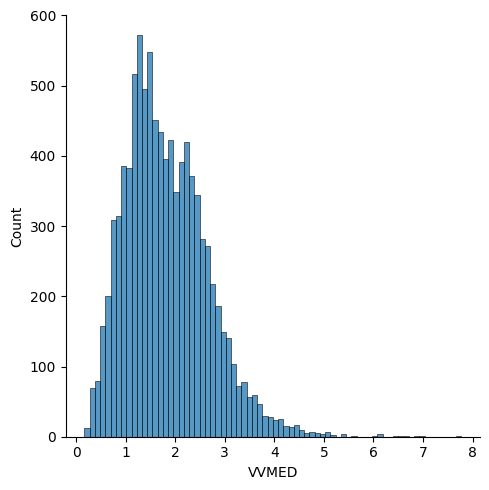

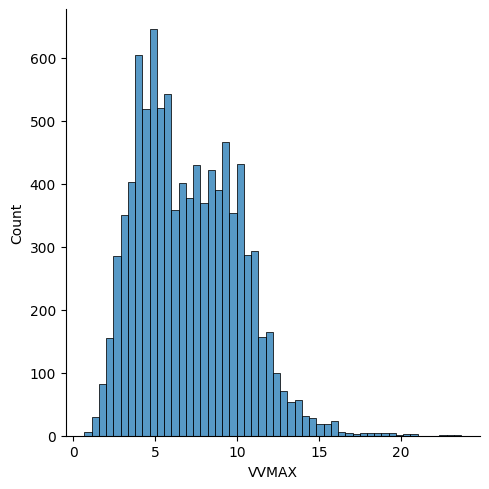

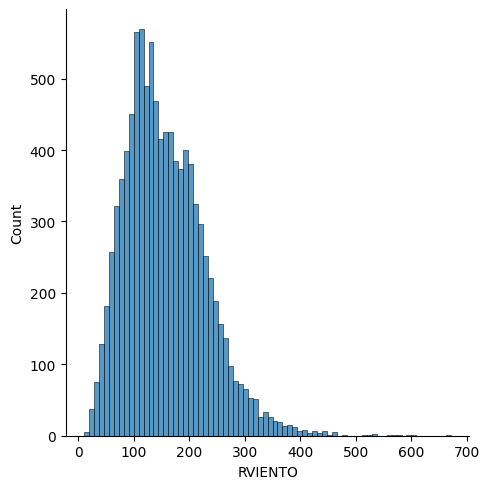

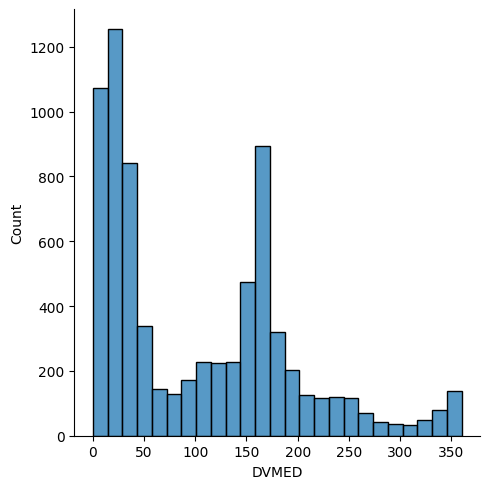

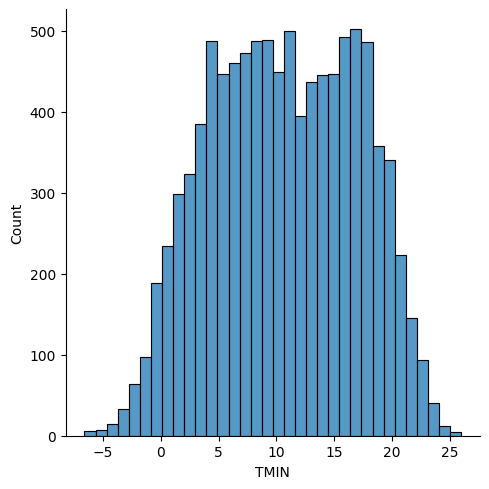

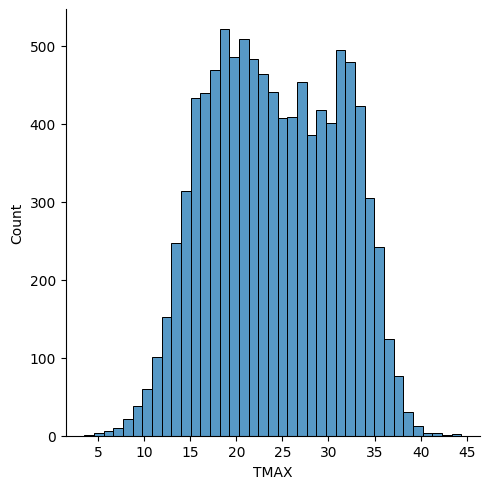

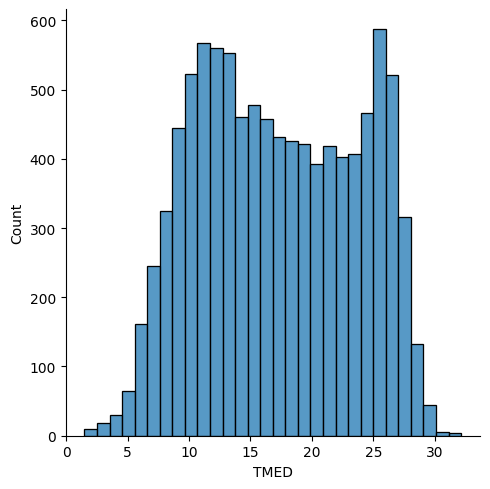

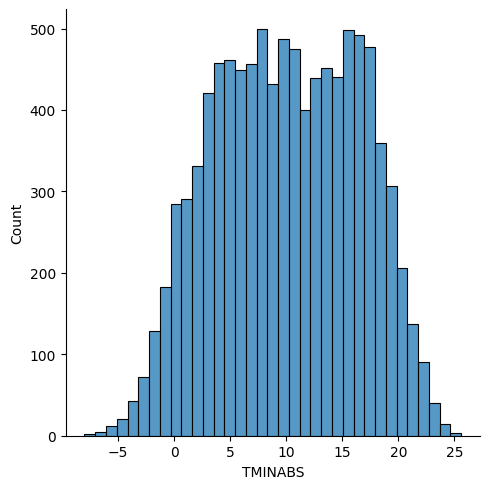

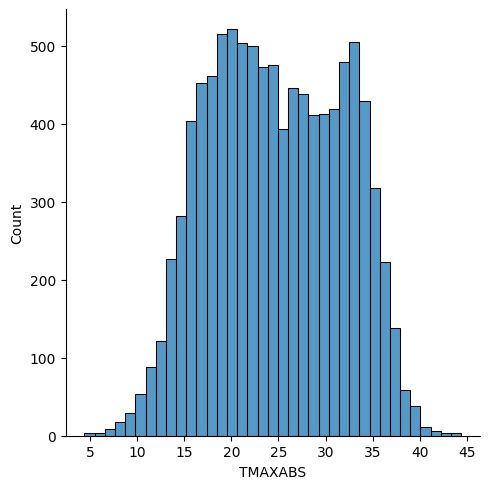

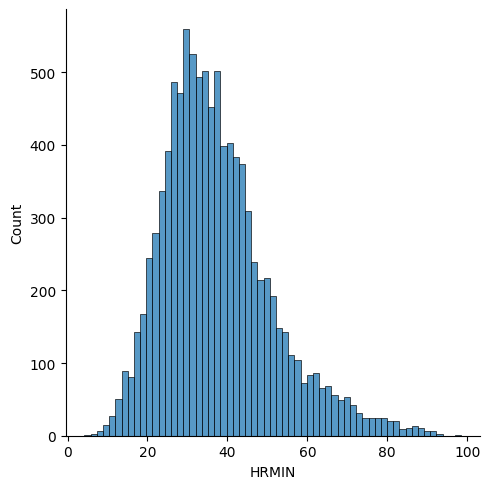

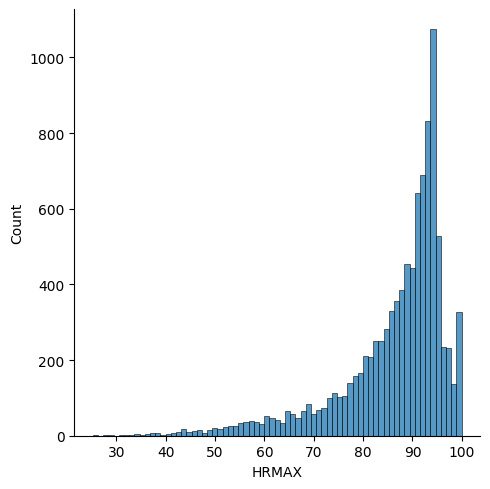

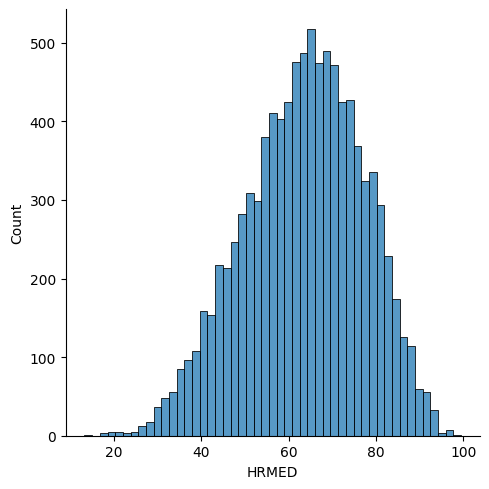

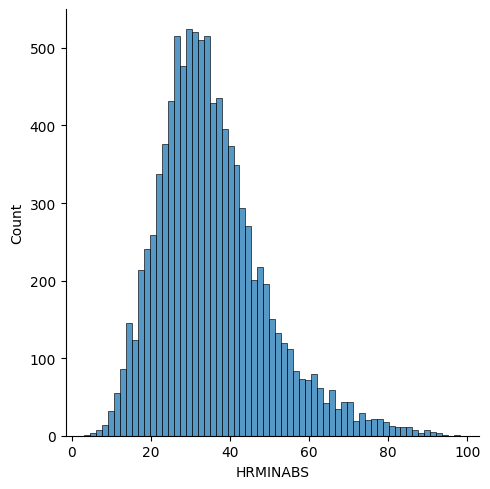

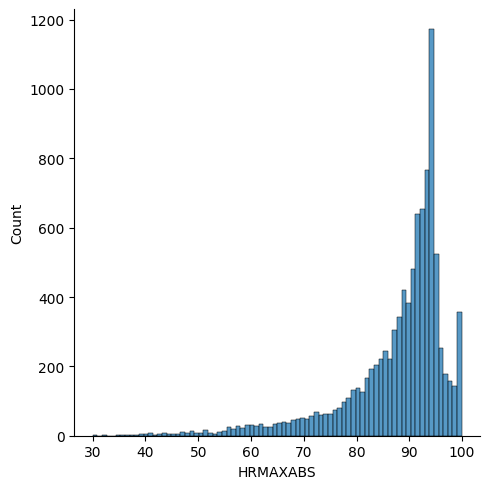

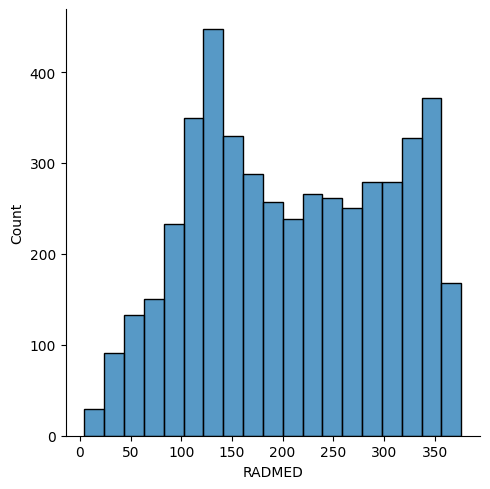

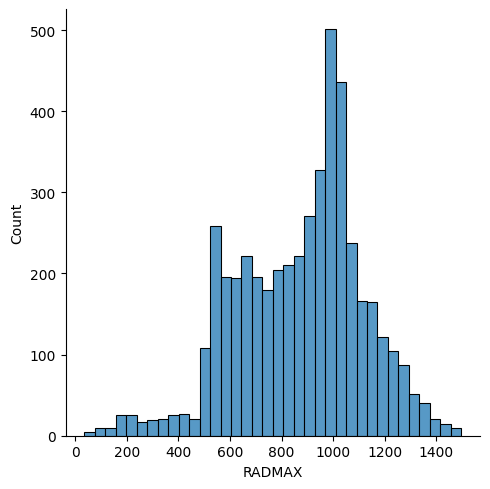

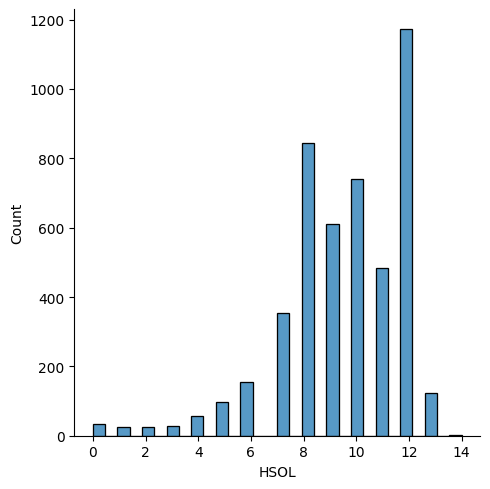

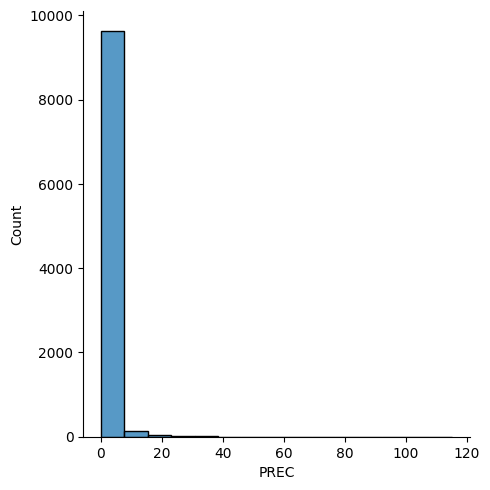

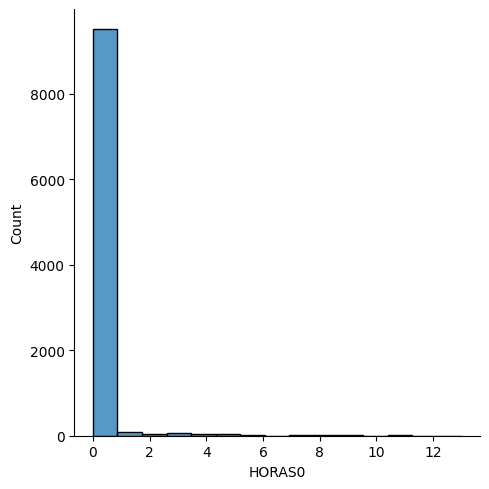

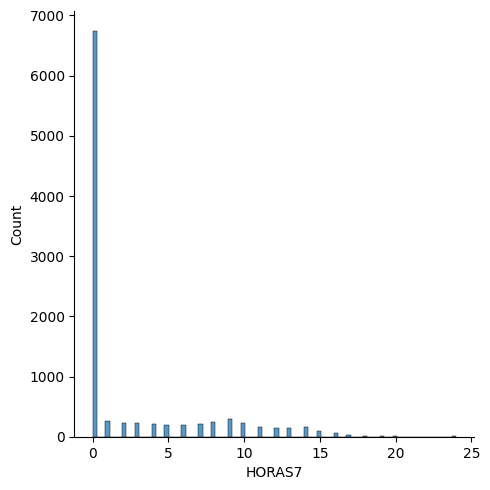

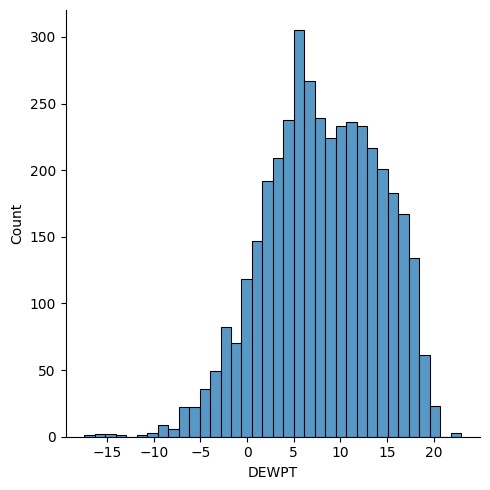

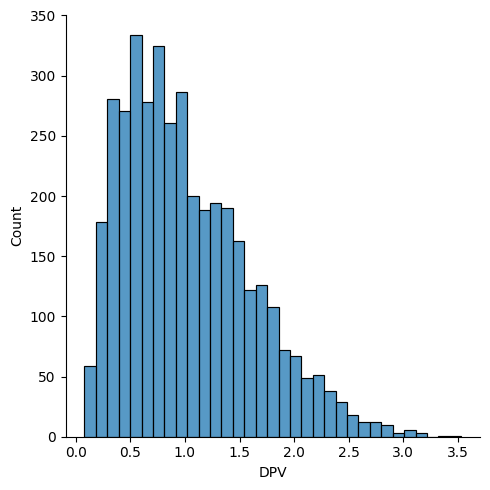

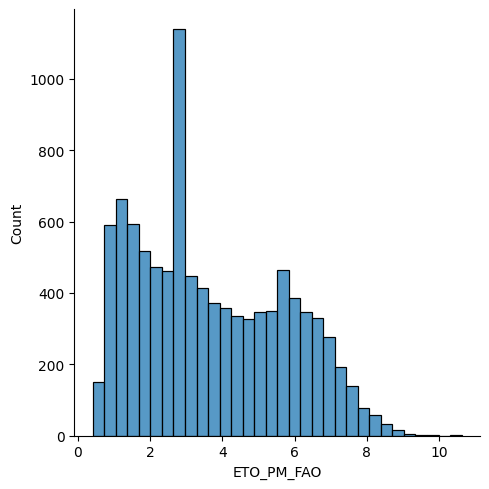

In [13]:
for variable in dataset.columns:
    if(variable != 'FECHA' and variable != 'CODEST'):
        sns.displot(data=dataset[variable])
        plt.show()

## Diagramas de caja

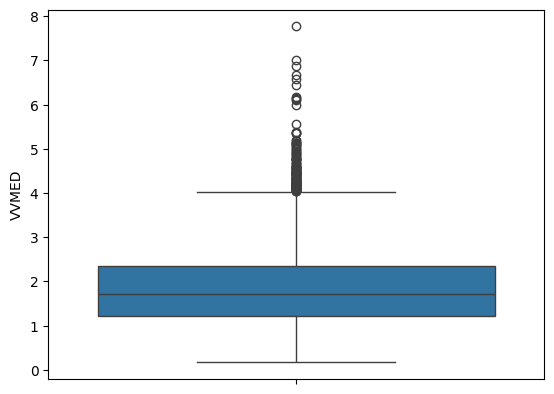

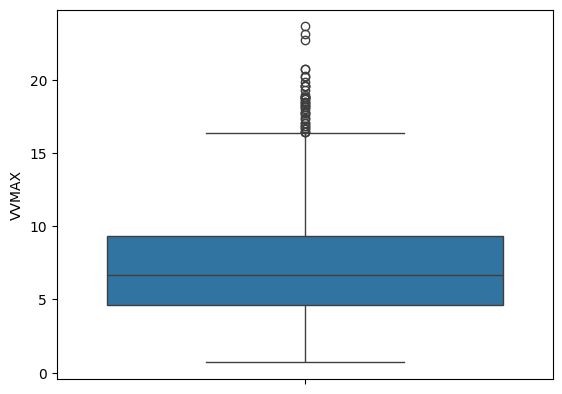

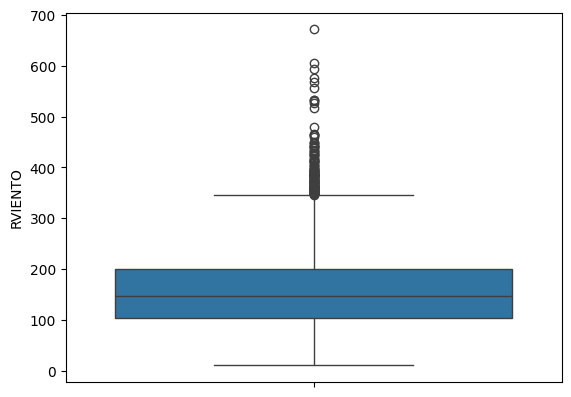

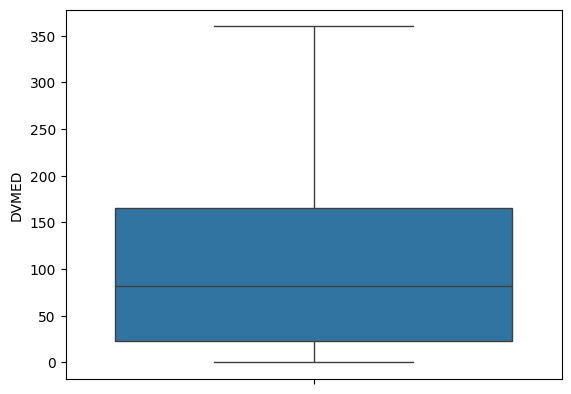

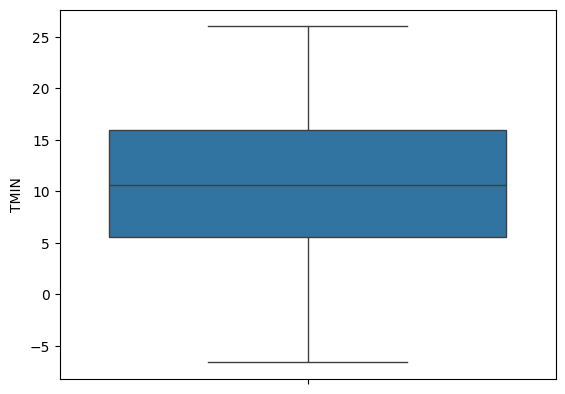

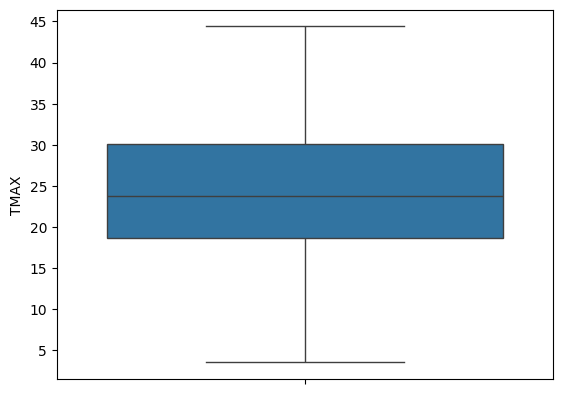

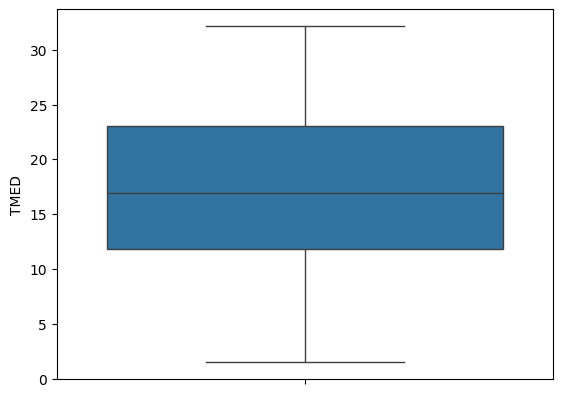

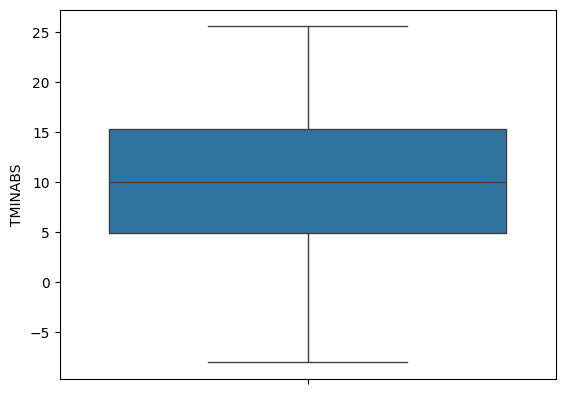

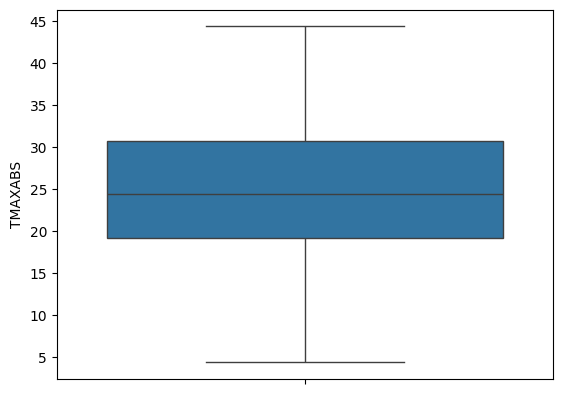

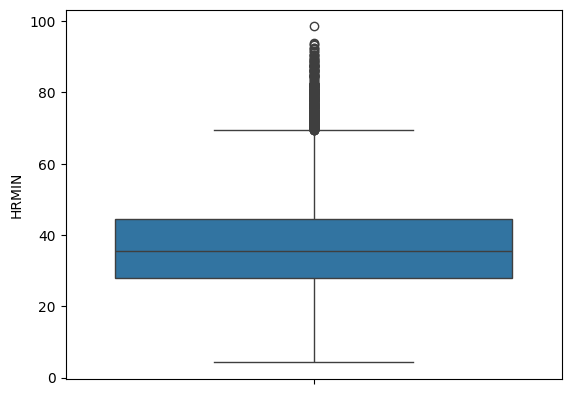

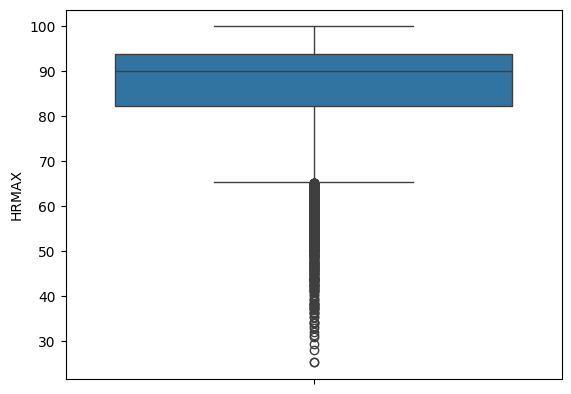

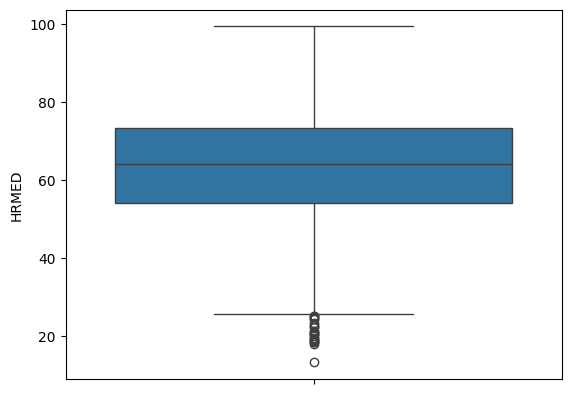

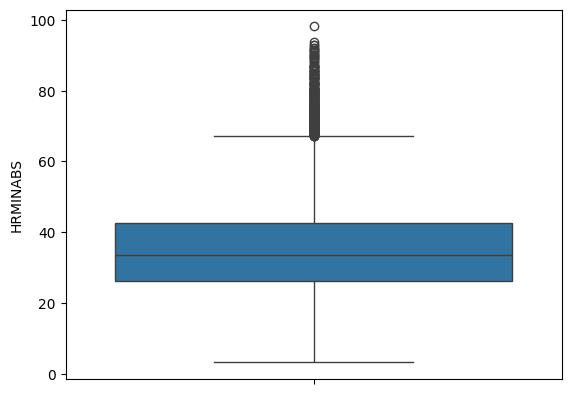

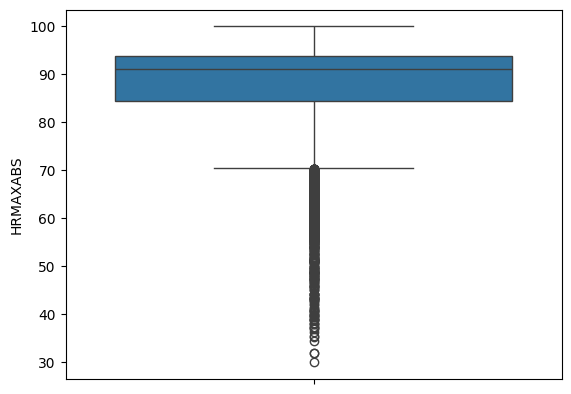

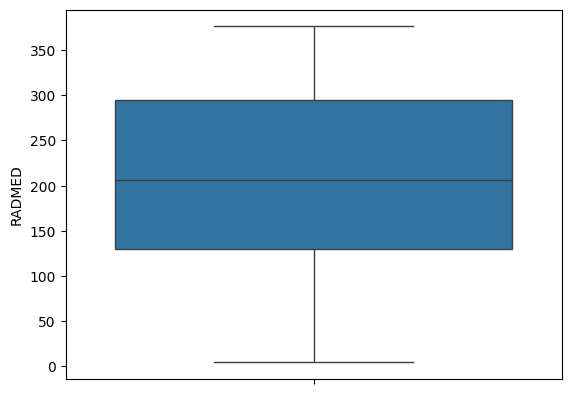

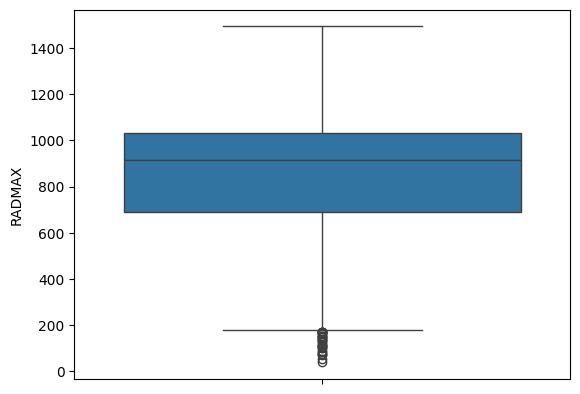

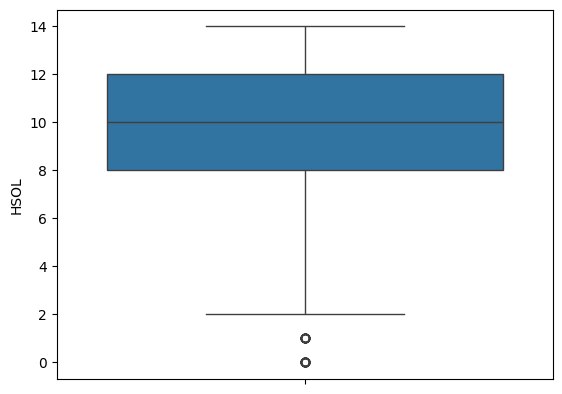

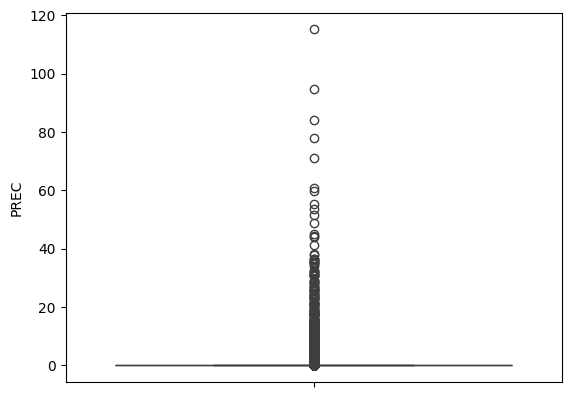

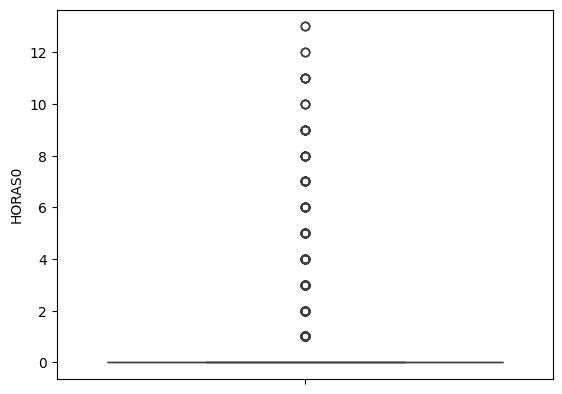

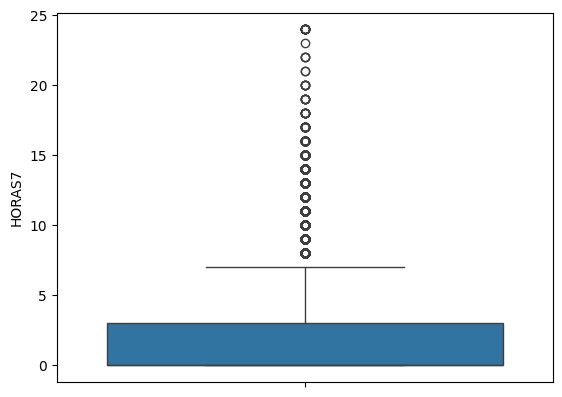

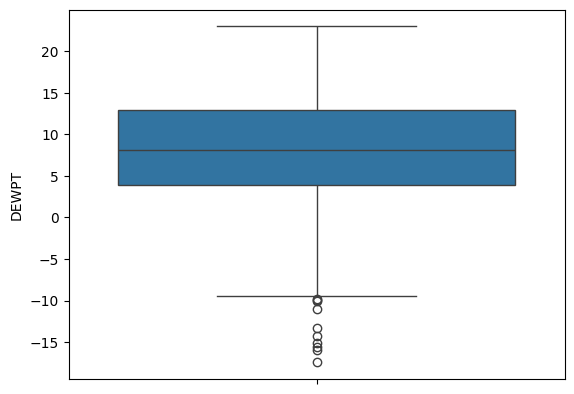

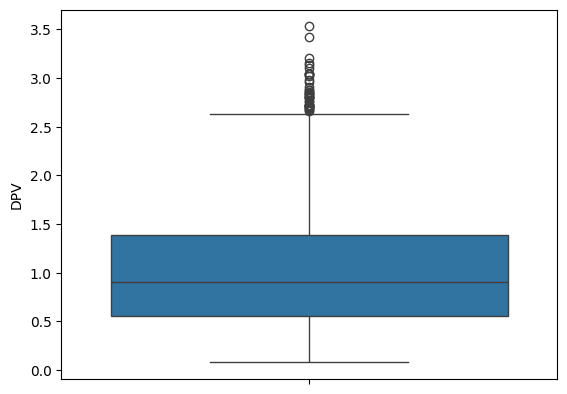

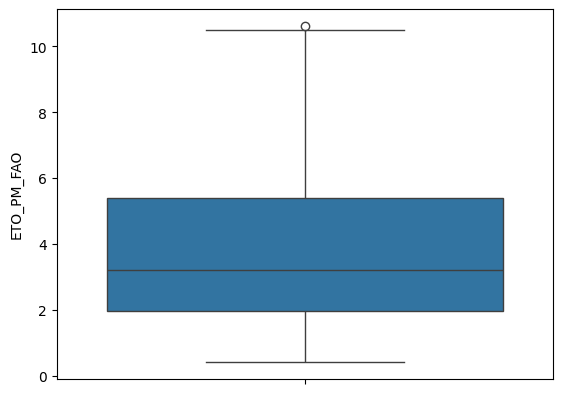

In [14]:
for x in dataset.columns:
    if(x != 'FECHA' and x != 'CODEST'):
        sns.boxplot(data=dataset[x])
        plt.show()

## Plot evolución temporal

Podemos ver como evoluciona cada variable con el tiempo. Cosas a destacar son:
* Todas las variables se comportan de forma adecuada a partir de poco más de la mitad
* Podemos ver los nulos de manera bastante clara
* DVMED tiene un tramo raro al principio porque antes se media en radianes
* Podríamos usar Horas0 u Horas7 para automatizar las estaciones 

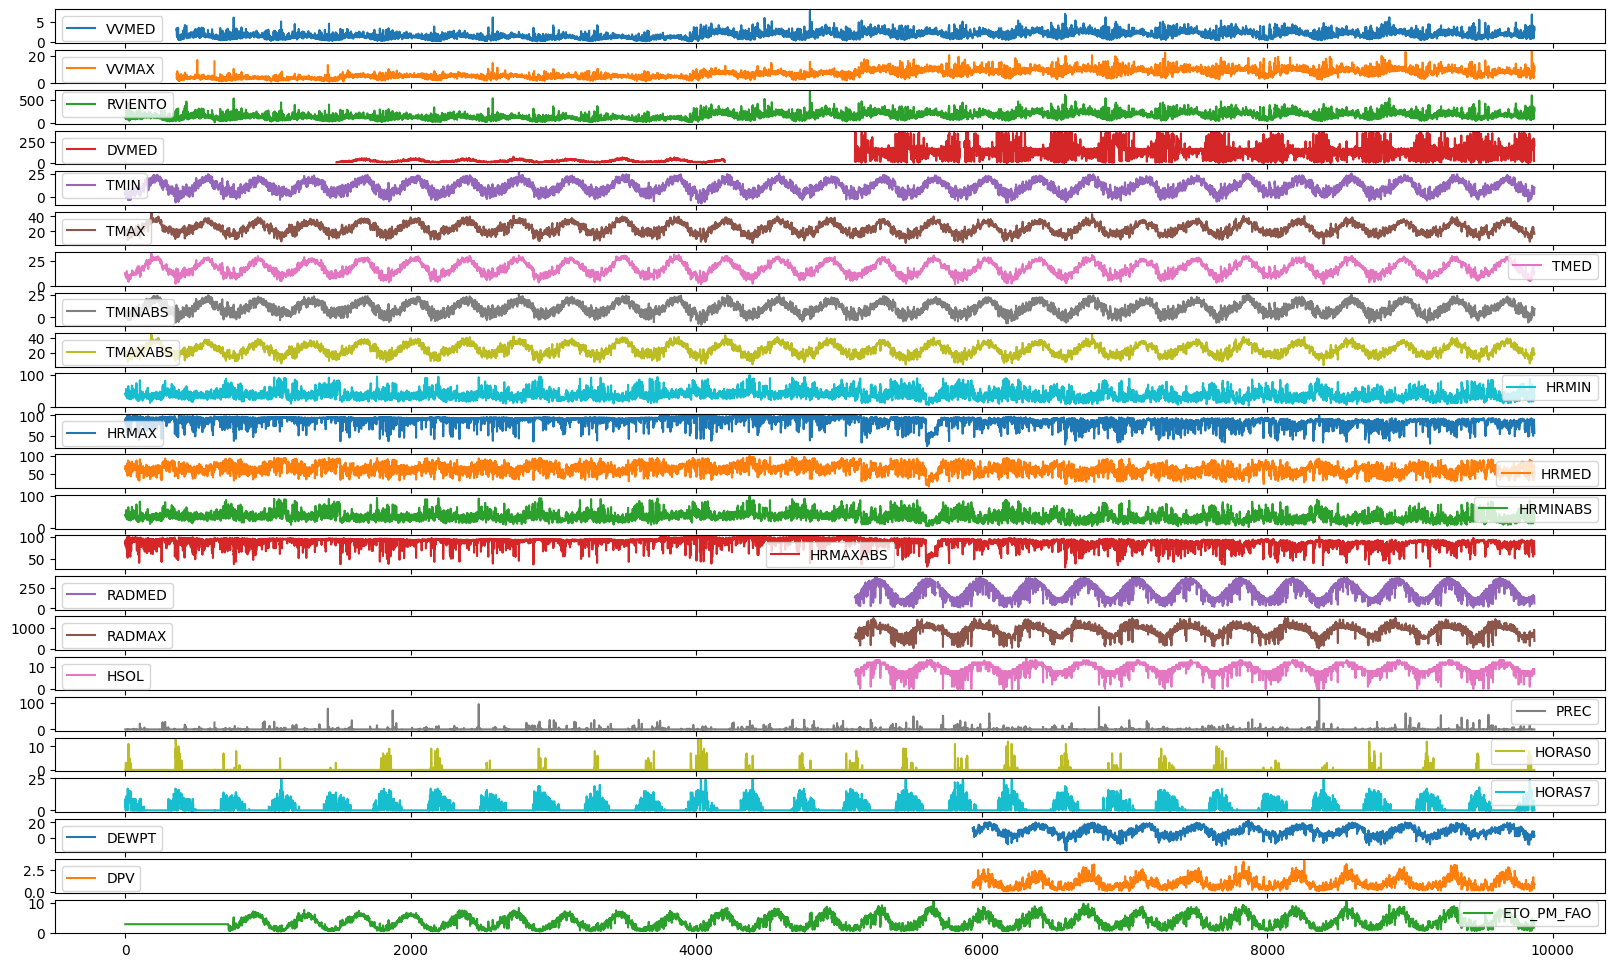

In [15]:
dataset.drop(['CODEST', 'FECHA'], axis=1).plot(subplots=True, figsize=(20,12))
plt.show()

## Relaciones de variables

### Pairplot criminal

In [16]:
'''
sns.pairplot(data=dataset)
plt.show()
'''

'\nsns.pairplot(data=dataset)\nplt.show()\n'

### Mapas de calor

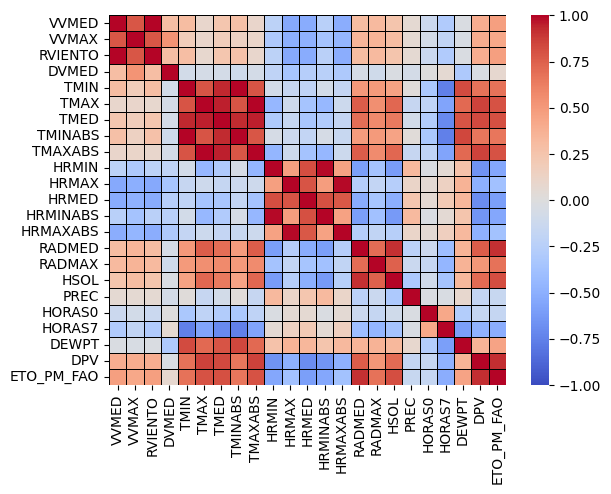

In [17]:
sns.heatmap(data=dataset.corr(numeric_only=True), center=0, vmin=-1, vmax=1, linewidths=0.5, cmap='coolwarm', linecolor='black')
plt.show()

#### Cluster

Los clustermap funcionan de la siguiente manera: Hay varios niveles (clusters) que dependen de la correlación, en el primer nivel se "solapan" las variables que estén más relacionadas entre sí, por ejemplo, HRMIN-HRMINABS o DPV-ETO_PM_FAO. Para el siguiente nivel se vuelven a sacar correlaciones contando las uniones anteriores como una sola variable y se vuelven a unir dependiendo de las nuevas correlaciones, por ejemplo, las uniones previas DPV-ETO_PM_FAO y HSOL-RADMED se unen. Este proceso se continua sucesivamente hasta que solo haya "una variable general"

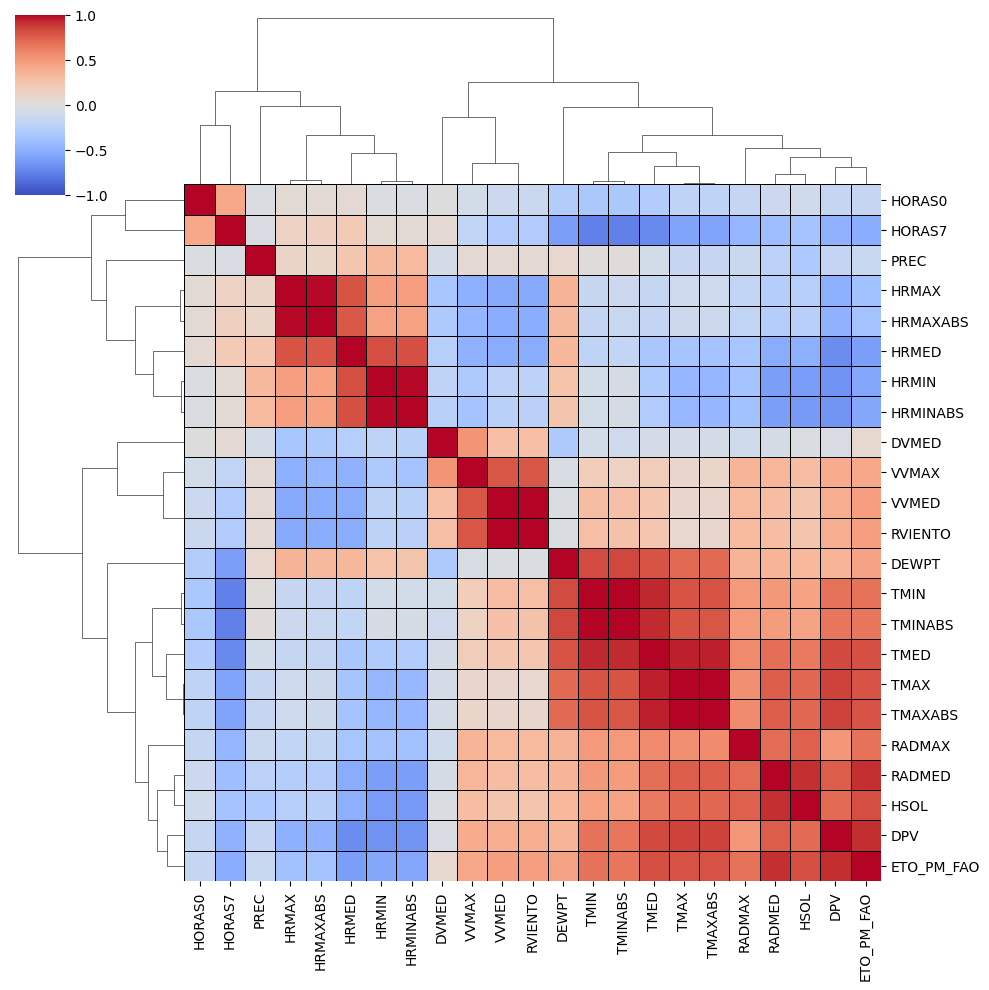

In [18]:
sns.clustermap(data=dataset.corr(numeric_only=True), center=0, vmin=-1, vmax=1, linewidths=0.5, cmap='coolwarm', linecolor='black')
plt.show()

### Relaciones concretas

#### Temperatura mínima-Horas bajo 0

Evidentemente, si la temperatura mínima es 0 o más, no pueden haber horas bajo 0

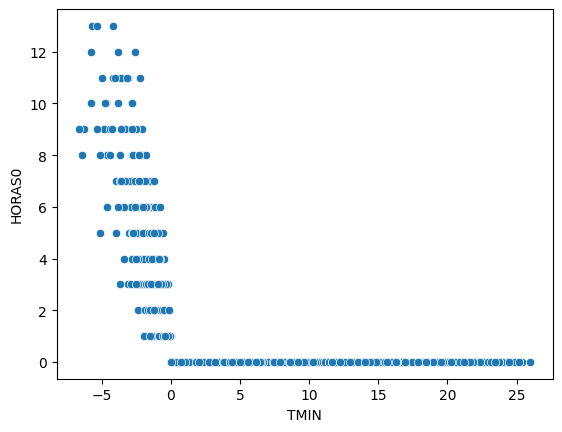

In [19]:
sns.scatterplot(data=dataset, x='TMIN', y='HORAS0')
plt.show()

#### minimos y maximos - minAbs y maxAbs

Totalmente correlacionados

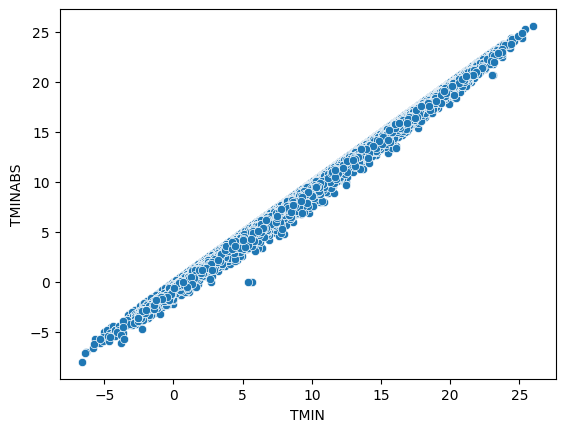

In [20]:
sns.scatterplot(data=dataset, x='TMIN', y='TMINABS')
plt.show()

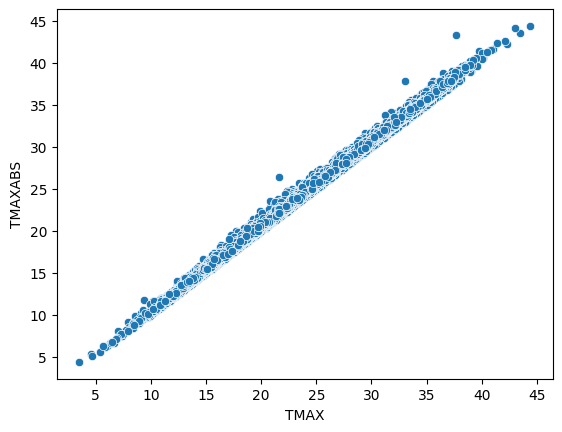

In [21]:
sns.scatterplot(data=dataset, x='TMAX', y='TMAXABS')
plt.show()

#### rviento-vvmed

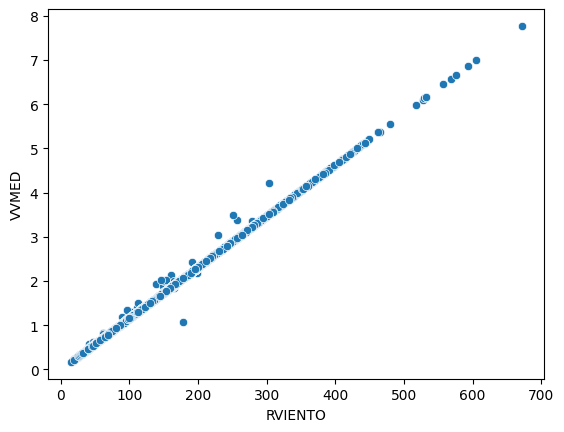

In [22]:
sns.scatterplot(data=dataset, x='RVIENTO', y='VVMED')
plt.show()

#### ETO_PM_FAO

##### Regresion y sacar outliers

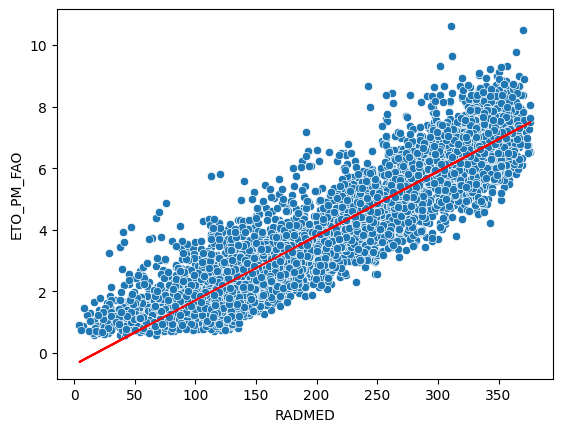

In [23]:
res = scipy.stats.linregress(x=dataset.dropna()['RADMED'], y=dataset.dropna()['ETO_PM_FAO'])
y = res.slope * dataset.dropna()['RADMED'].values + res.intercept
plt.plot(dataset.dropna()['RADMED'], y, c='r')
sns.scatterplot(data=dataset, x='RADMED', y='ETO_PM_FAO')
plt.show()

Sacar outliers

In [24]:
data_xd = dataset.drop("FECHA", axis=1)
data_xd = data_xd.drop("CODEST", axis=1)
def remove_outliers_zscore(data, threshold=100.0):
    z_scores = np.abs(stats.zscore(data))
    filtered_data = data[(z_scores < threshold).all(axis=1)]
    return filtered_data, z_scores
filtered_data, z_scores = remove_outliers_zscore(data_xd.values)
print(filtered_data)
print(z_scores)

[]
[[       nan        nan 0.48699251 ...        nan        nan        nan]
 [       nan        nan 0.72272316 ...        nan        nan        nan]
 [       nan        nan 0.86817399 ...        nan        nan        nan]
 ...
 [       nan        nan 1.18764249 ...        nan        nan        nan]
 [       nan        nan 2.44417602 ...        nan        nan        nan]
 [       nan        nan 1.49261553 ...        nan        nan        nan]]


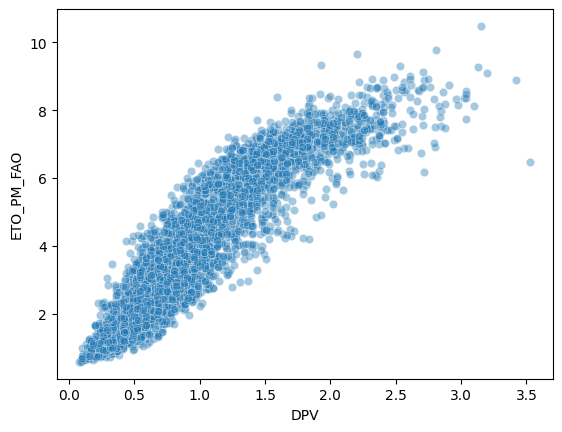

In [25]:
sns.scatterplot(data=dataset, x='DPV', y='ETO_PM_FAO', alpha=1/2.5)
plt.show()

#### HSOL-RADMED

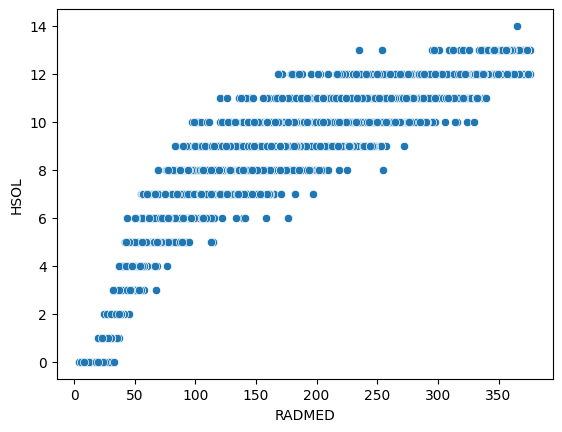

In [26]:
sns.scatterplot(data=dataset, x='RADMED', y='HSOL')
plt.show()

### Poco correlacionadas

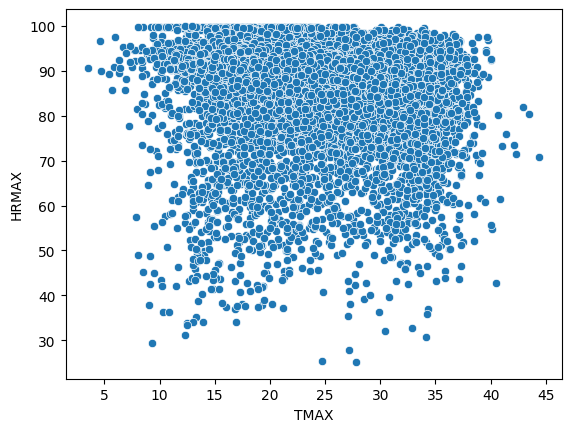

In [27]:
sns.scatterplot(data=dataset, x='TMAX', y='HRMAX')
plt.show()

## Proporción visual de nulos

### Cuantos nulos por variable

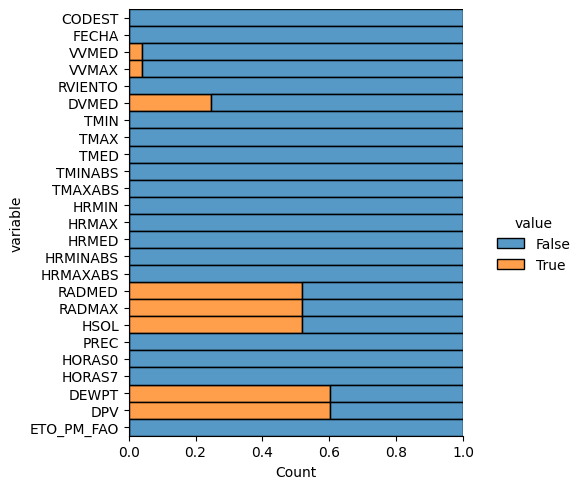

In [28]:
dataset.isnull().melt().pipe(lambda df: (sns.displot(data=df, y='variable', hue='value', multiple='fill')))

### Cuantos nulos por fila

<Axes: >

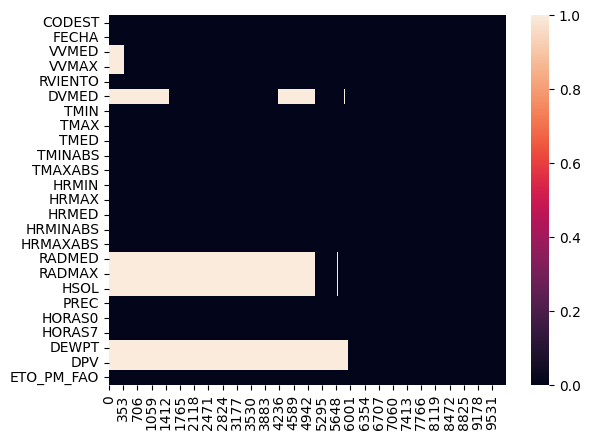

In [29]:
dataset.isnull().transpose().pipe(lambda df: (sns.heatmap(data=df)))

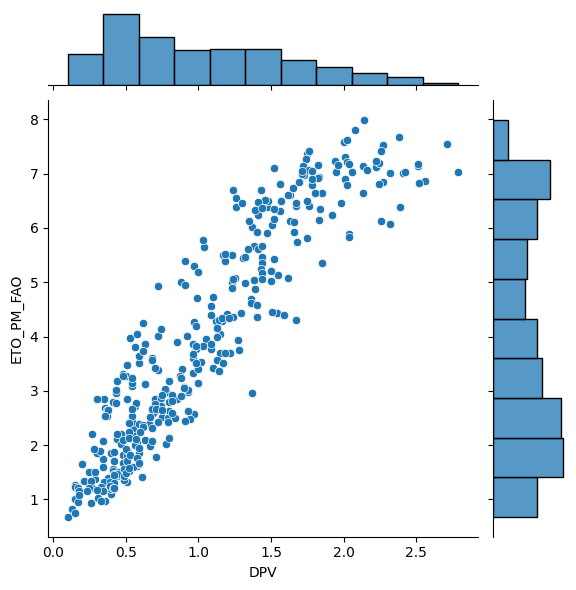

In [30]:
miniData = dataset.loc[9500:,:]
sns.jointplot(data=miniData, x='DPV', y='ETO_PM_FAO')
plt.show()

## Relaciones de tiempo

### Sacamos una nueva columna para acceder a los años de forma más sencilla

In [31]:
years = []
for x in dataset['FECHA'].values:
    years.append(int(x.astype(str)[0:4]))
dataset['AÑO'] = years
dataset.head(5)

CODEST      FECHA  VVMED  VVMAX  RVIENTO  DVMED  TMIN  TMAX   TMED  TMINABS  \
0   AL41 1994-01-01    NaN    NaN   121.68    NaN   5.9  19.1  12.87      5.9   
1   AL41 1994-01-02    NaN    NaN   104.76    NaN   2.9  20.8  11.75      2.9   
2   AL41 1994-01-03    NaN    NaN    94.32    NaN   2.8  19.4  10.56      2.8   
3   AL41 1994-01-04    NaN    NaN   153.36    NaN   8.3  15.6  12.20      8.3   
4   AL41 1994-01-05    NaN    NaN   151.92    NaN  -0.4  16.1   8.55     -0.4   

   ...  RADMED  RADMAX  HSOL  PREC  HORAS0  HORAS7  DEWPT  DPV  ETO_PM_FAO  \
0  ...     NaN     NaN   NaN   0.0     0.0     3.0    NaN  NaN    2.928228   
1  ...     NaN     NaN   NaN   0.0     0.0     9.0    NaN  NaN    2.928228   
2  ...     NaN     NaN   NaN   0.0     0.0     8.0    NaN  NaN    2.928228   
3  ...     NaN     NaN   NaN   0.0     0.0     0.0    NaN  NaN    2.928228   
4  ...     NaN     NaN   NaN   0.0     3.0     8.0    NaN  NaN    2.928228   

    AÑO  
0  1994  
1  1994  
2  1994  
3  1994  
4  1994  

[5 rows x 26 columns]

Así podemos ver como evolucionan las variables en el transcurso de un año

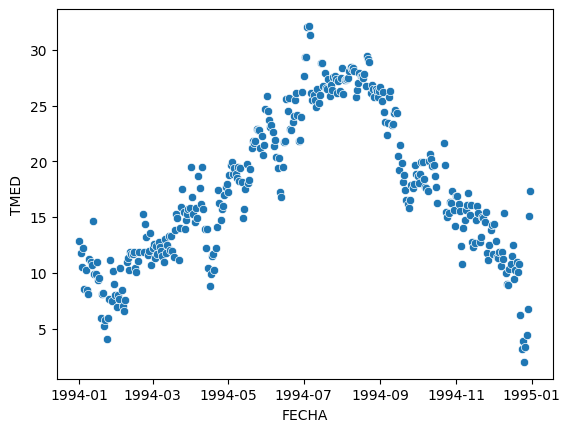

In [32]:
data2 = dataset[dataset['AÑO'] == 1994]
sns.scatterplot(data=data2, x=data2['FECHA'], y='TMED')
plt.show()

### Dividir por estaciones

In [33]:
estaciones = []
for x in dataset['FECHA'].values:
    if(int(x.astype(str)[5:7]) < 3):
        estaciones.append('INVIERNO')
    elif(int(x.astype(str)[5:7]) == 3):
        if(int(x.astype(str)[8:10]) <= 20):
            estaciones.append('INVIERNO')
        else:
            estaciones.append('PRIMAVERA')
    elif(int(x.astype(str)[5:7]) < 6):
        estaciones.append('PRIMAVERA')
    elif(int(x.astype(str)[5:7]) == 6):
        if(int(x.astype(str)[8:10]) <= 20):
            estaciones.append('PRIMAVERA')
        else:
            estaciones.append('VERANO')
    elif(int(x.astype(str)[5:7]) < 9):
        estaciones.append('VERANO')
    elif(int(x.astype(str)[5:7]) == 9):
        if(int(x.astype(str)[8:10]) <= 22):
            estaciones.append('VERANO')
        else:
            estaciones.append('OTOÑO')
    elif(int(x.astype(str)[5:7]) < 12):
        estaciones.append('OTOÑO')
    else:
        if(int(x.astype(str)[8:10]) >= 22):
            estaciones.append('INVIERNO')
        else:
            estaciones.append('OTOÑO')
dataset['ESTACION'] = estaciones
dataset.head(5)

CODEST      FECHA  VVMED  VVMAX  RVIENTO  DVMED  TMIN  TMAX   TMED  TMINABS  \
0   AL41 1994-01-01    NaN    NaN   121.68    NaN   5.9  19.1  12.87      5.9   
1   AL41 1994-01-02    NaN    NaN   104.76    NaN   2.9  20.8  11.75      2.9   
2   AL41 1994-01-03    NaN    NaN    94.32    NaN   2.8  19.4  10.56      2.8   
3   AL41 1994-01-04    NaN    NaN   153.36    NaN   8.3  15.6  12.20      8.3   
4   AL41 1994-01-05    NaN    NaN   151.92    NaN  -0.4  16.1   8.55     -0.4   

   ...  RADMAX  HSOL  PREC  HORAS0  HORAS7  DEWPT  DPV  ETO_PM_FAO   AÑO  \
0  ...     NaN   NaN   0.0     0.0     3.0    NaN  NaN    2.928228  1994   
1  ...     NaN   NaN   0.0     0.0     9.0    NaN  NaN    2.928228  1994   
2  ...     NaN   NaN   0.0     0.0     8.0    NaN  NaN    2.928228  1994   
3  ...     NaN   NaN   0.0     0.0     0.0    NaN  NaN    2.928228  1994   
4  ...     NaN   NaN   0.0     3.0     8.0    NaN  NaN    2.928228  1994   

   ESTACION  
0  INVIERNO  
1  INVIERNO  
2  INVIERNO  
3  INVIERNO  
4  INVIERNO  

[5 rows x 27 columns]

Misma gráfica que antes pero ahora con estaciones

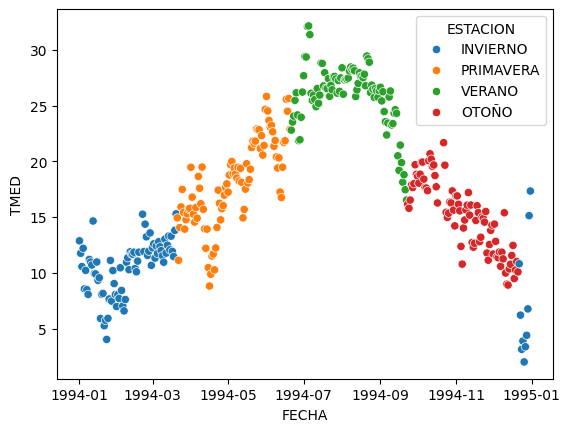

In [34]:
data2 = dataset[dataset['AÑO'] == 1994]
sns.scatterplot(data=data2, x=data2['FECHA'], y='TMED', hue='ESTACION')
plt.show()

## Graficar con estas nuevas variables

In [35]:
#sns.pairplot(data=dataset, hue='ESTACION', corner=True)
#plt.show()

### DPV-HRMED

DPV=Deficit presion de vapor

Cuanta mas humedad, menos deficit. Segun la estación, habrá un deficit distinto para un mismo nivel de humedad, eso significa que en estaciones como verano se puede tener un nivel más alto de humedad en el aire cuando está saturado

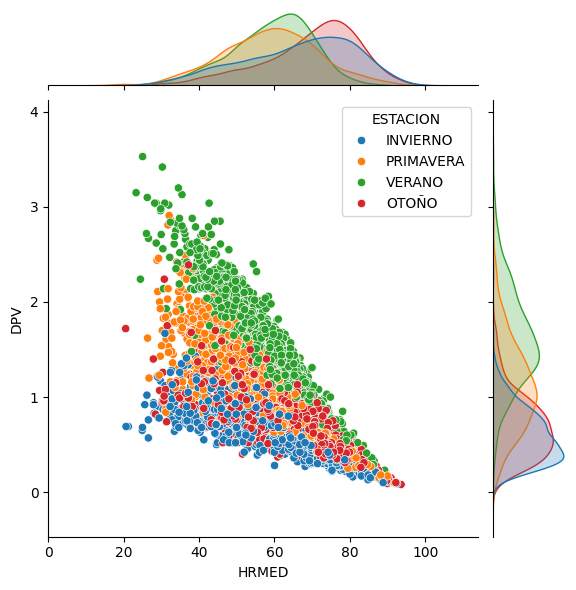

In [36]:
sns.jointplot(data=dataset, x='HRMED', y='DPV', hue='ESTACION')
plt.show()

#### Con rectas de regresión por cada estación

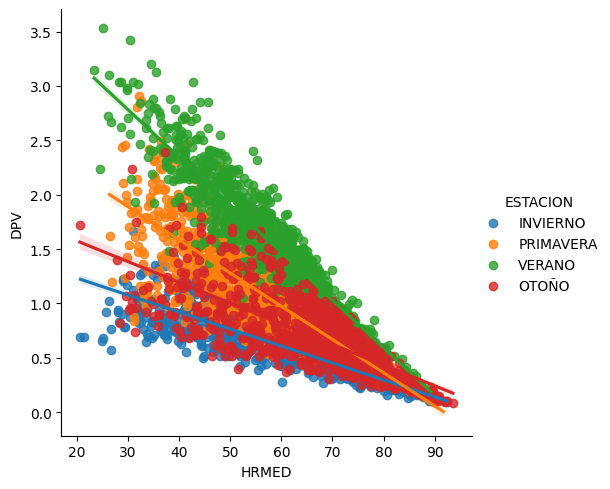

In [37]:
sns.lmplot(data=dataset, x='HRMED', y='DPV', hue='ESTACION')
plt.show()

#### Manual

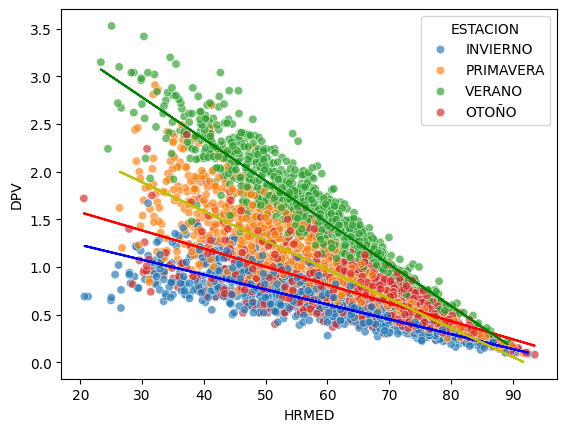

In [38]:
data_nn = dataset.dropna()
#print(data_nn[data_nn['ESTACION'] == 'INVIERNO']['ESTACION'].head(3))
#INVIERNO
res1 = scipy.stats.linregress(x=data_nn[data_nn['ESTACION'] == 'INVIERNO']['HRMED'], y=data_nn[data_nn['ESTACION'] == 'INVIERNO']['DPV'])
y1 = res1.slope * data_nn[data_nn['ESTACION'] == 'INVIERNO']['HRMED'].values + res1.intercept
plt.plot(data_nn[data_nn['ESTACION'] == 'INVIERNO']['HRMED'], y1, c='b')
#OTOÑO
res2 = scipy.stats.linregress(x=data_nn[data_nn['ESTACION'] == 'OTOÑO']['HRMED'], y=data_nn[data_nn['ESTACION'] == 'OTOÑO']['DPV'])
y2 = res2.slope * data_nn[data_nn['ESTACION'] == 'OTOÑO']['HRMED'].values + res2.intercept
plt.plot(data_nn[data_nn['ESTACION'] == 'OTOÑO']['HRMED'], y2, c='r')
#PRIMAVERA
res3 = scipy.stats.linregress(x=data_nn[data_nn['ESTACION'] == 'PRIMAVERA']['HRMED'], y=data_nn[data_nn['ESTACION'] == 'PRIMAVERA']['DPV'])
y3 = res3.slope * data_nn[data_nn['ESTACION'] == 'PRIMAVERA']['HRMED'].values + res3.intercept
plt.plot(data_nn[data_nn['ESTACION'] == 'PRIMAVERA']['HRMED'], y3, c='y')
#VERANO
res4 = scipy.stats.linregress(x=data_nn[data_nn['ESTACION'] == 'VERANO']['HRMED'], y=data_nn[data_nn['ESTACION'] == 'VERANO']['DPV'])
y4 = res4.slope * data_nn[data_nn['ESTACION'] == 'VERANO']['HRMED'].values + res4.intercept
plt.plot(data_nn[data_nn['ESTACION'] == 'VERANO']['HRMED'], y4, c='g')
#PUNTOS
sns.scatterplot(data=dataset, x='HRMED', y='DPV', hue='ESTACION', alpha=1/1.5)
plt.show()

### Histogramas

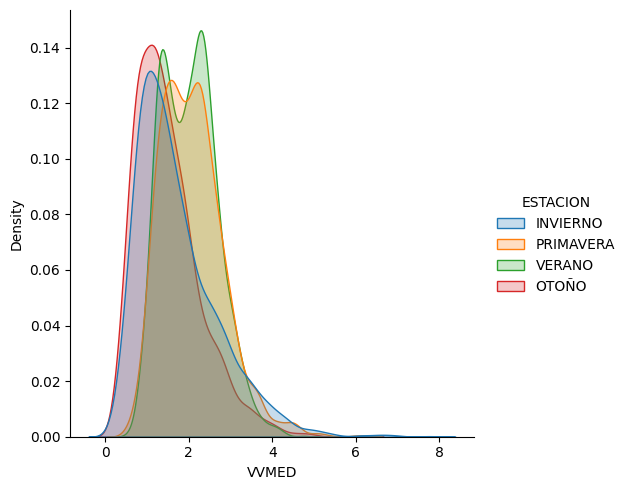

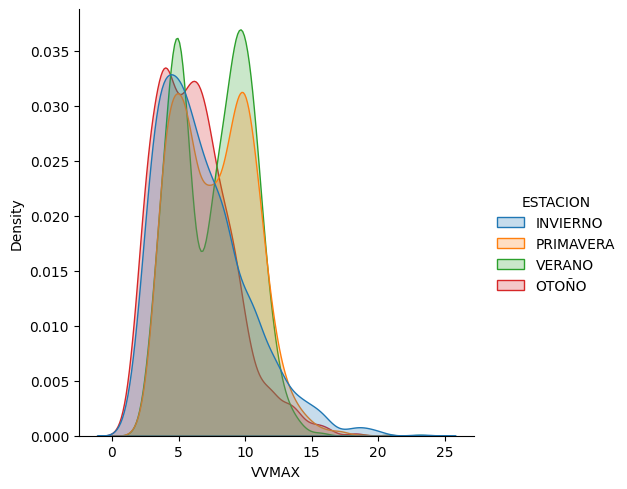

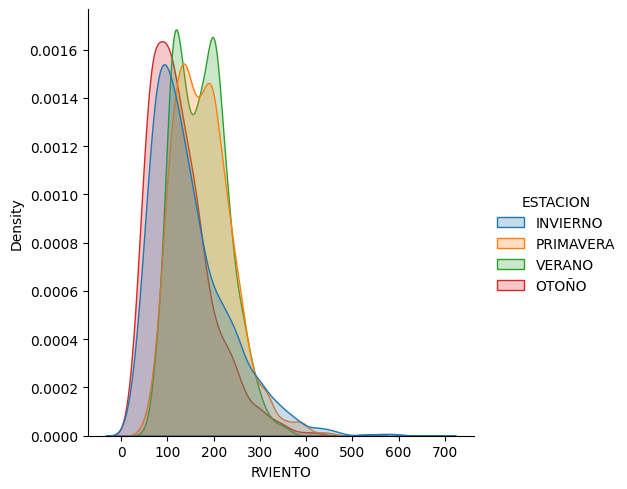

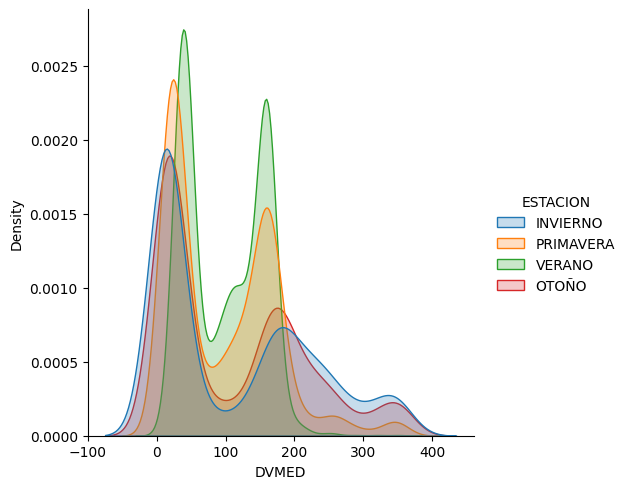

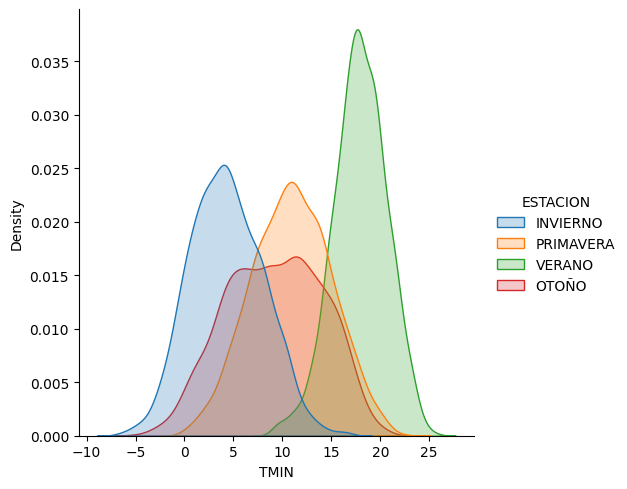

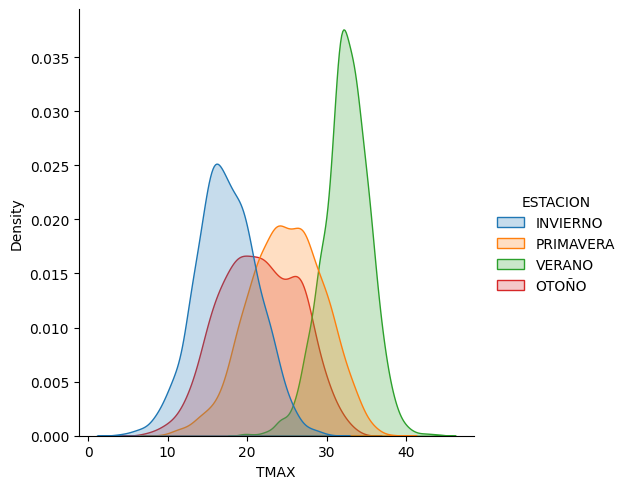

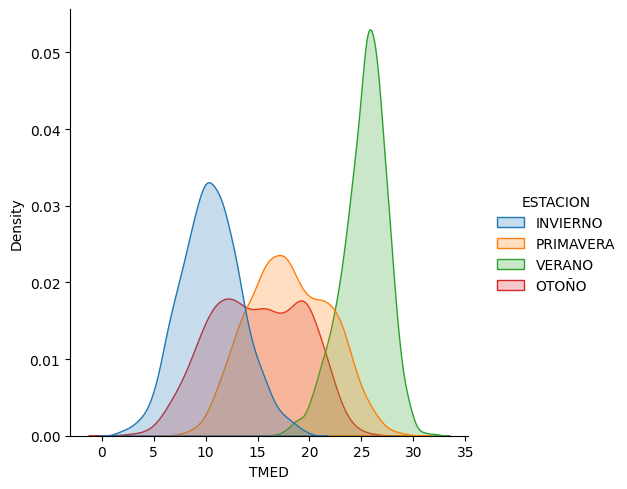

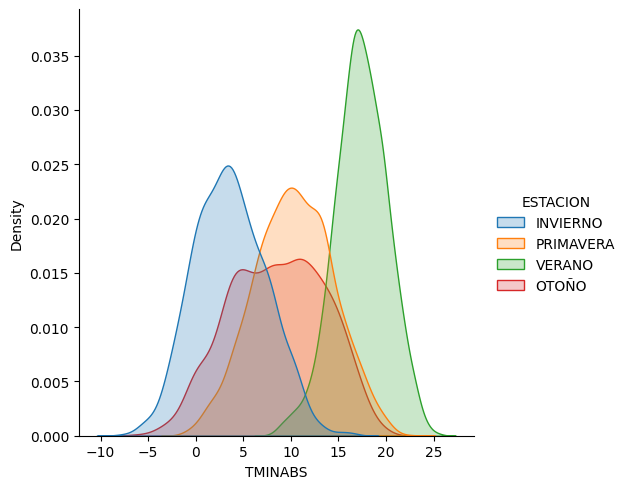

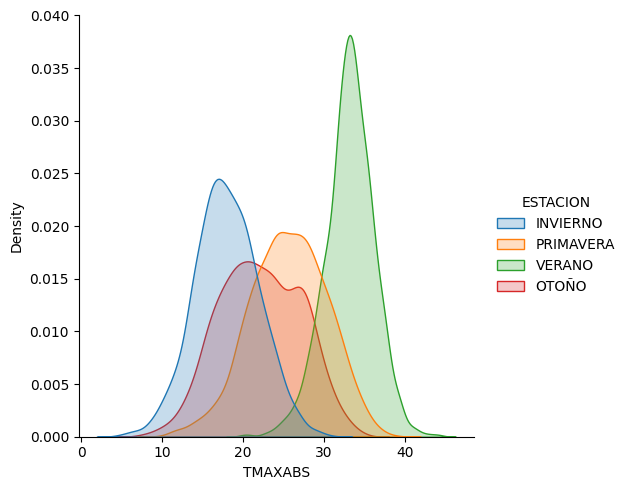

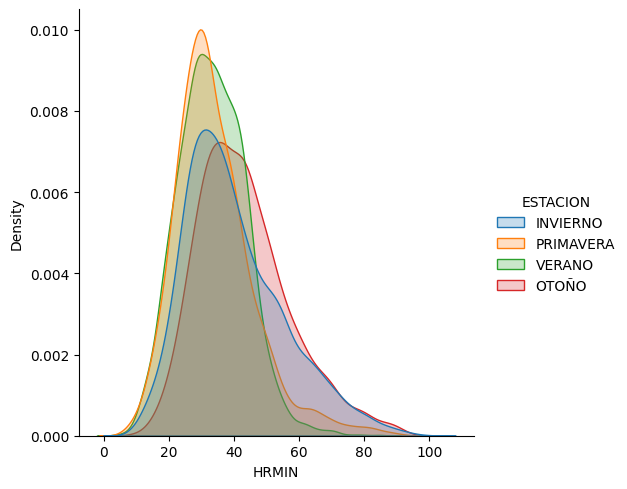

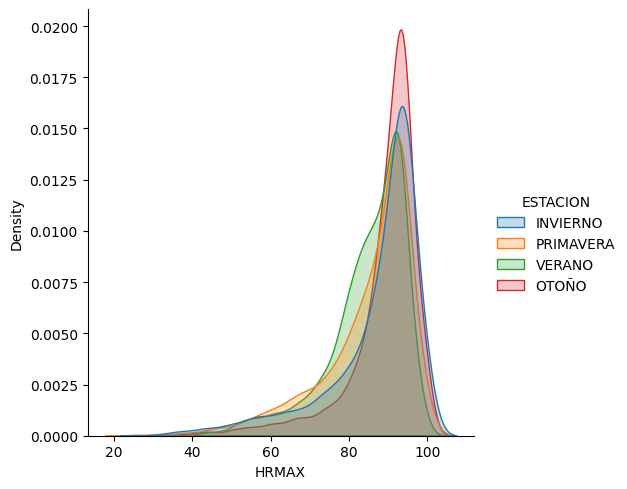

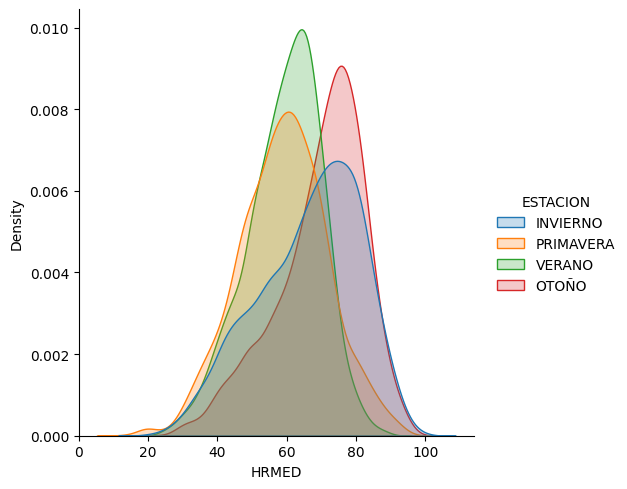

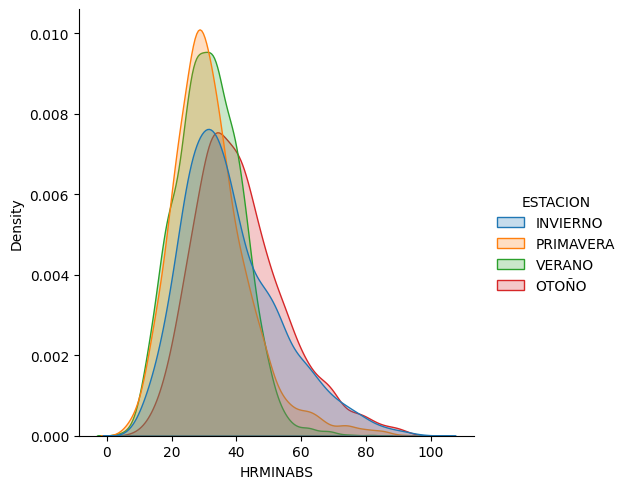

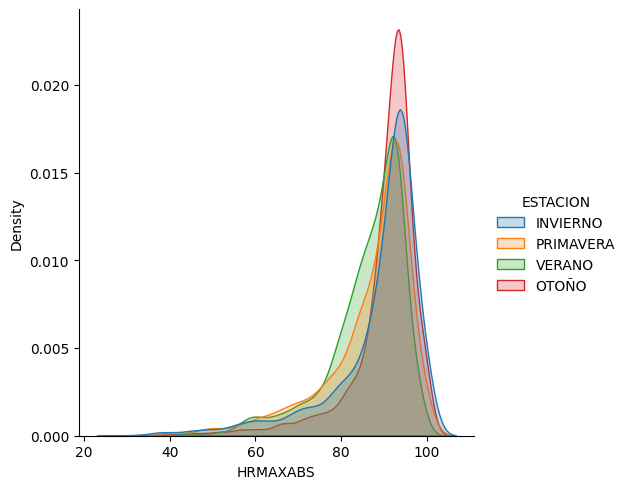

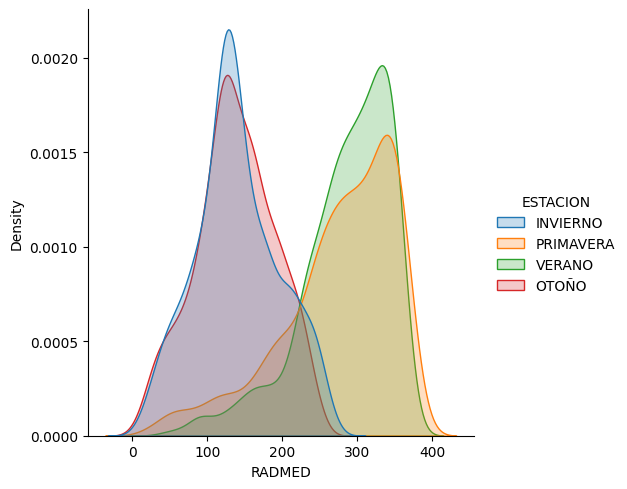

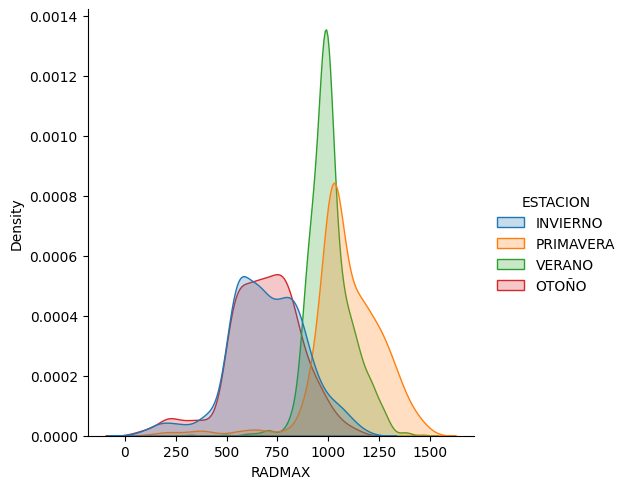

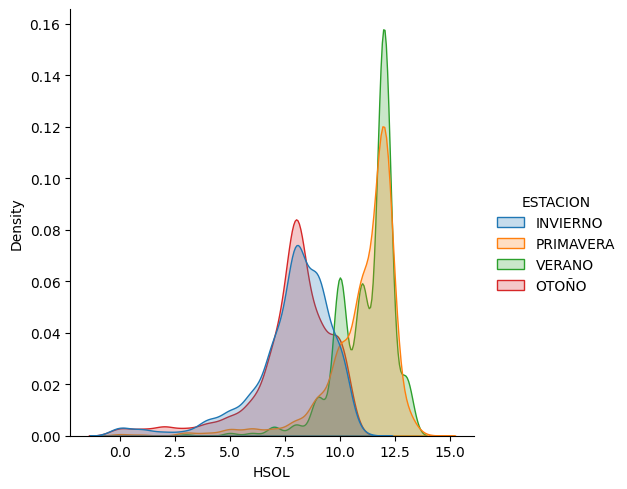

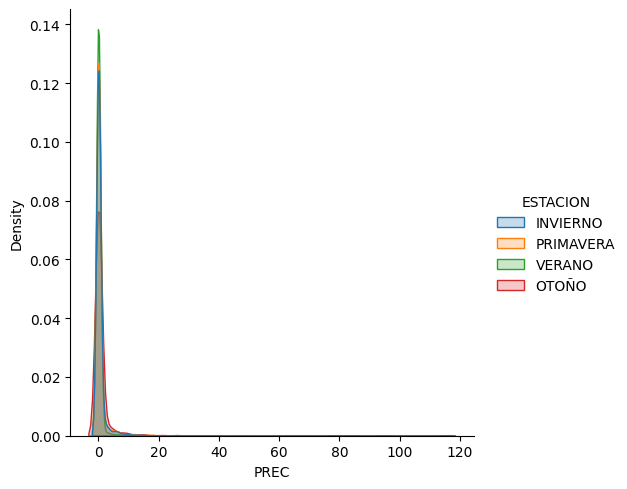

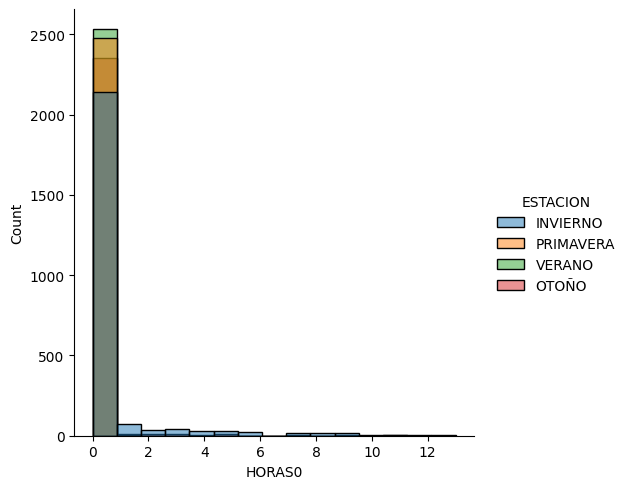

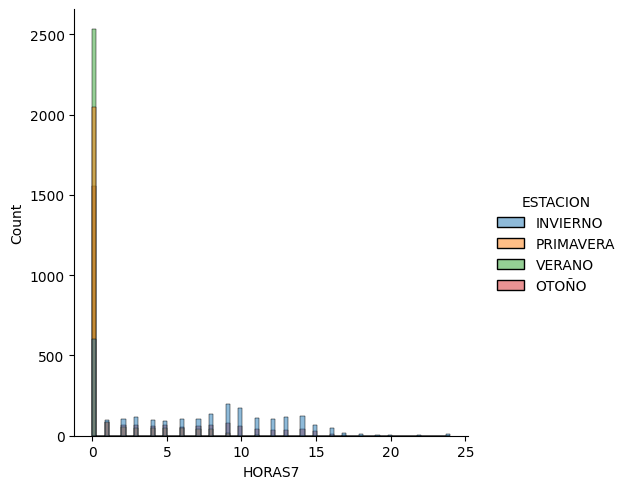

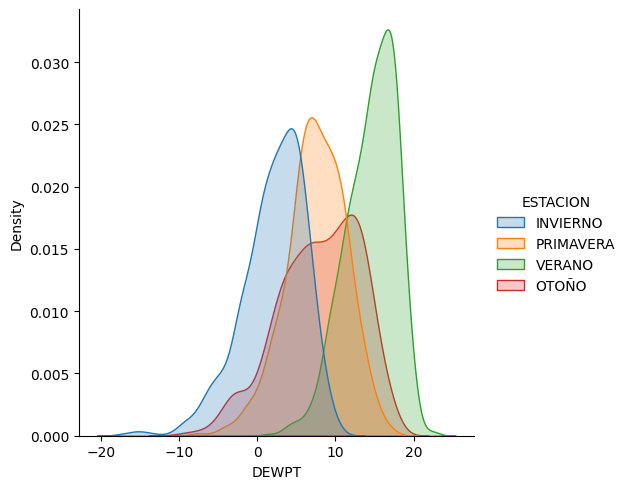

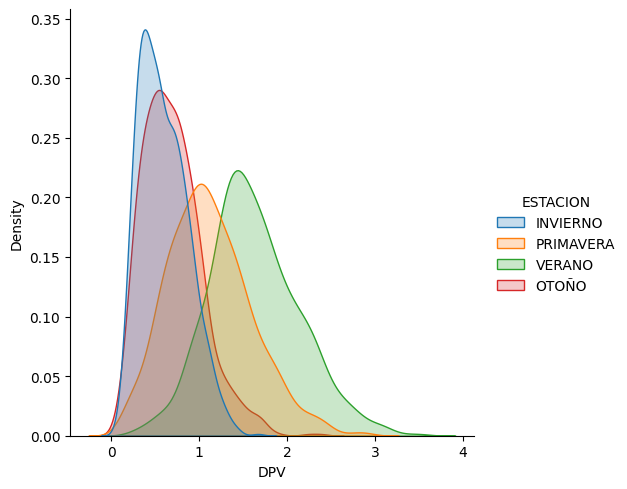

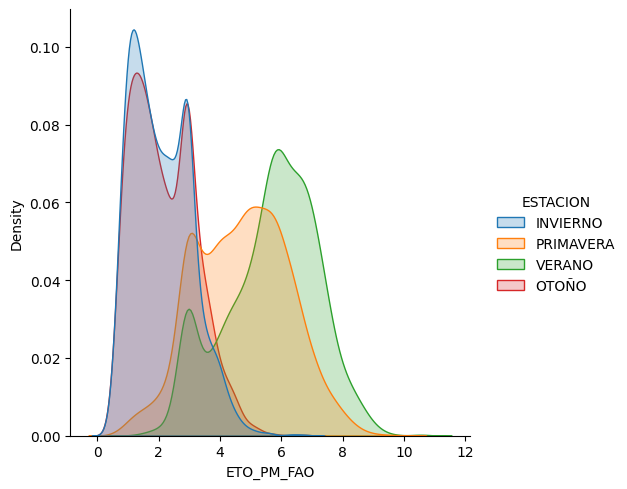

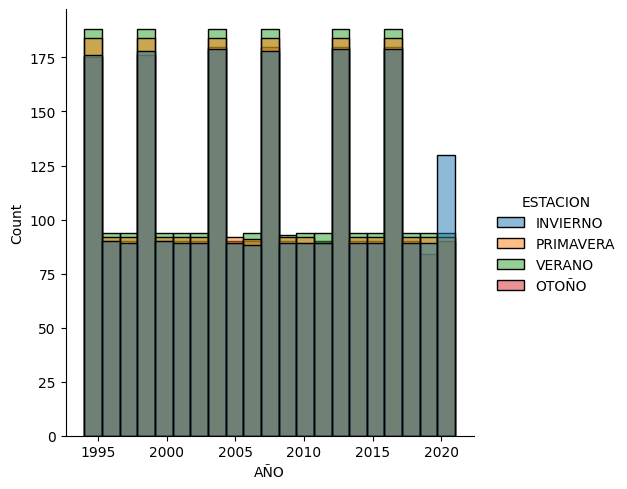

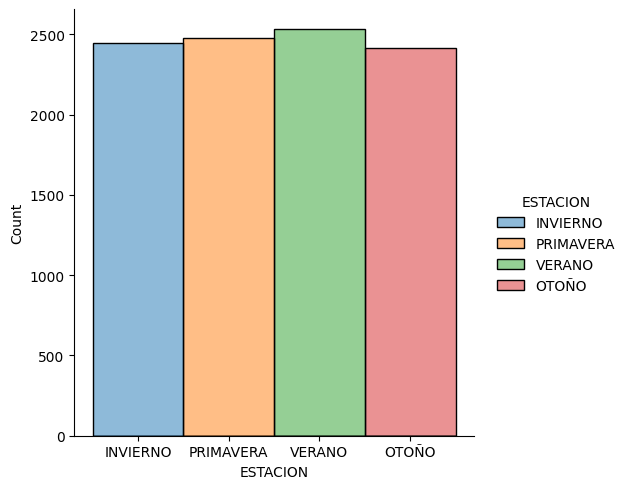

In [39]:
for variable in dataset:
    if ((variable != 'FECHA') and (variable != 'CODEST')):
        if (isinstance(dataset[variable][0], float) and (not 'HORAS' in variable)):
            sns.displot(data=dataset, x=variable, hue='ESTACION', kind='kde', fill=True)
        else:
            sns.displot(data=dataset, x=variable, hue='ESTACION')
        plt.show()

### Diagramas de caja

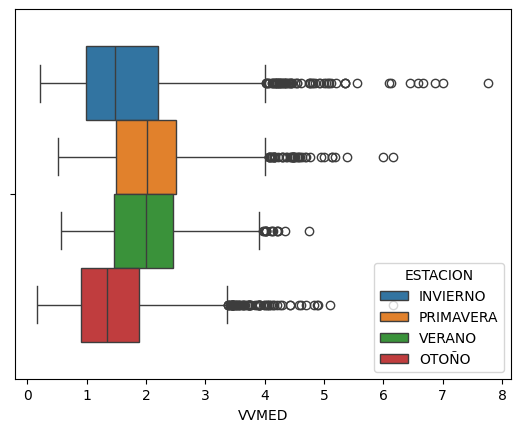

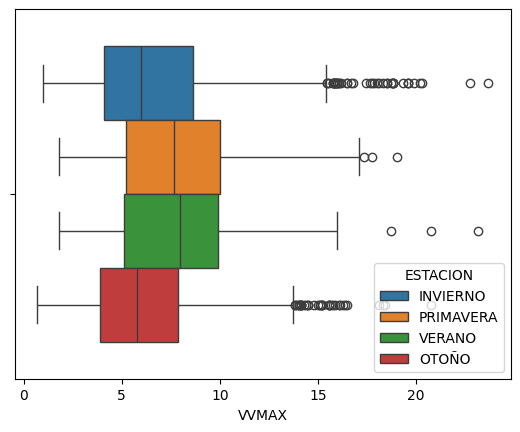

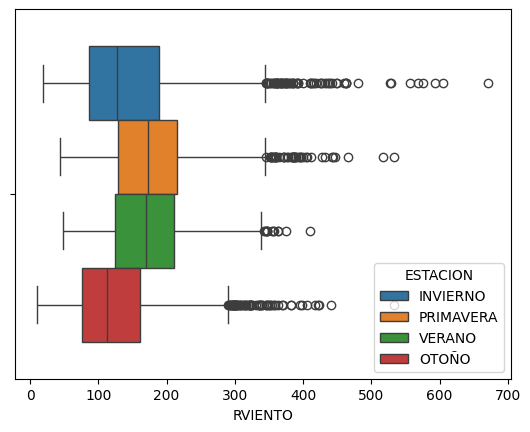

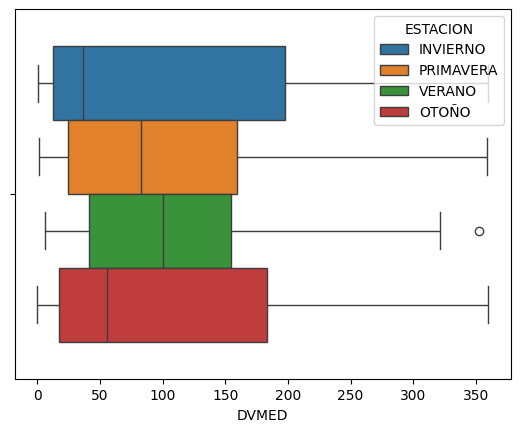

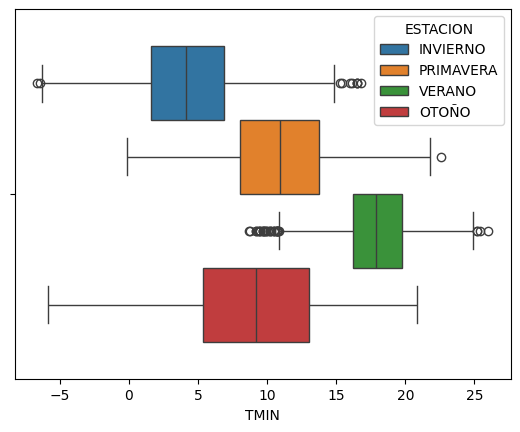

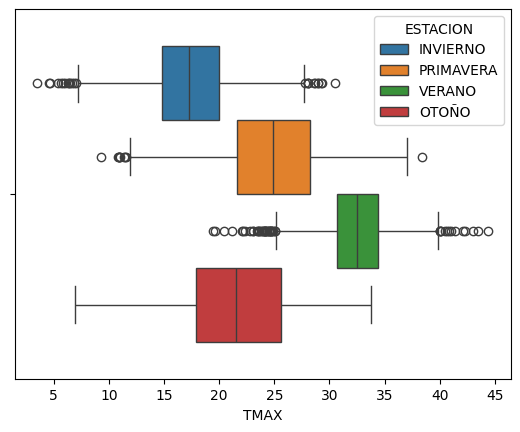

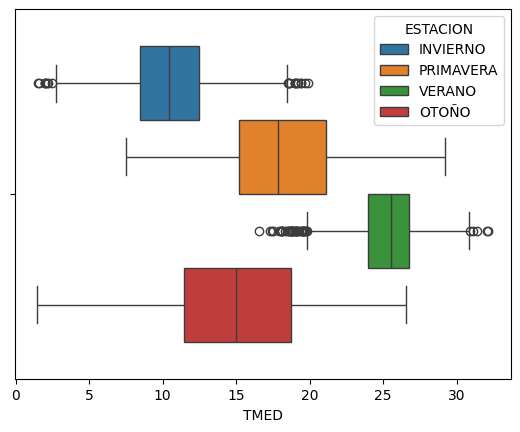

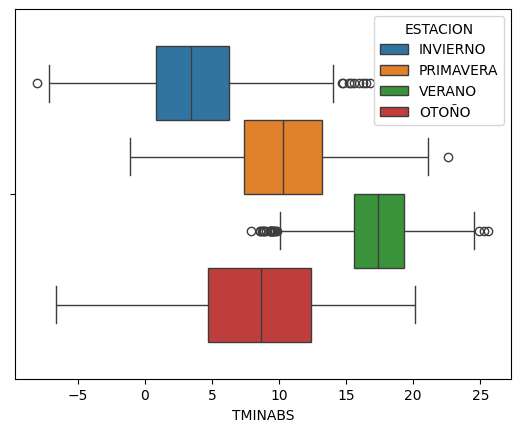

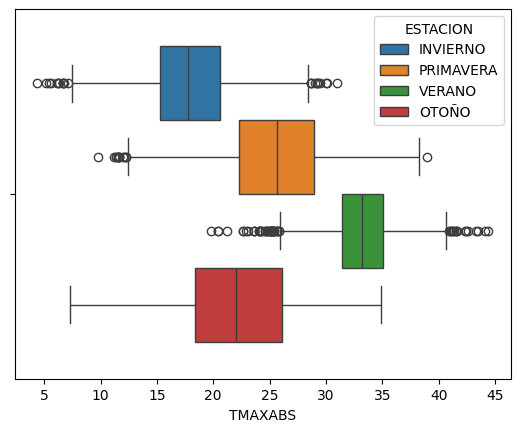

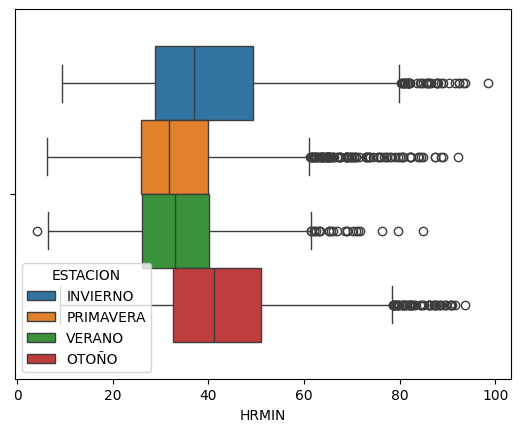

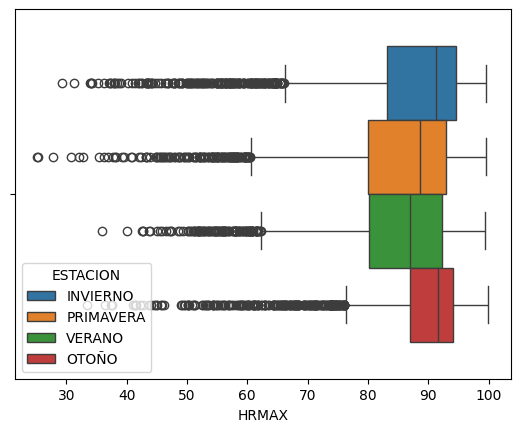

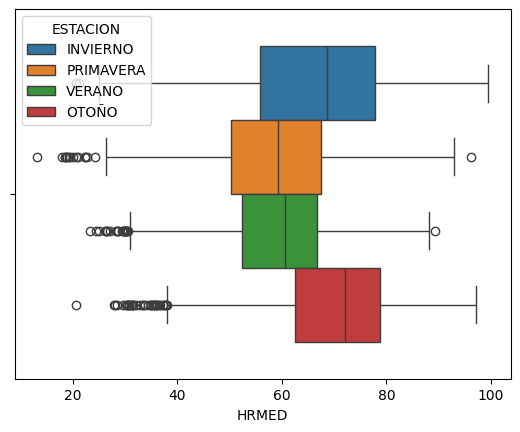

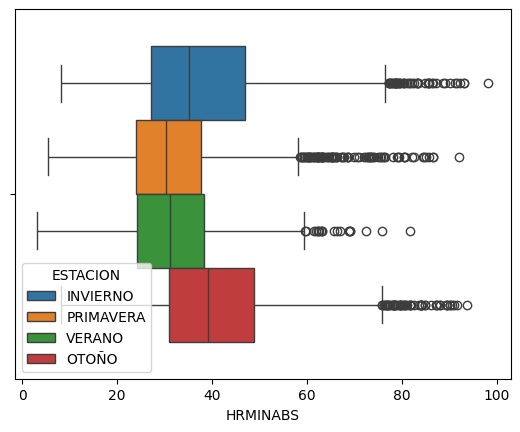

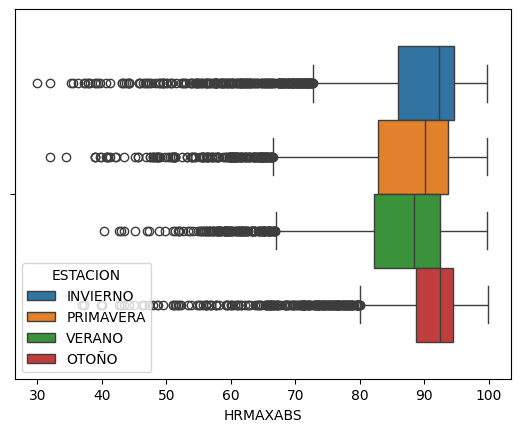

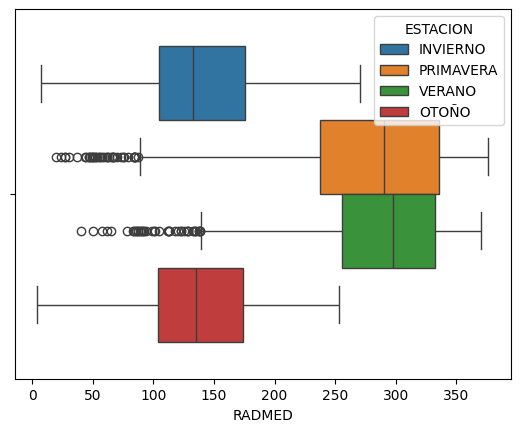

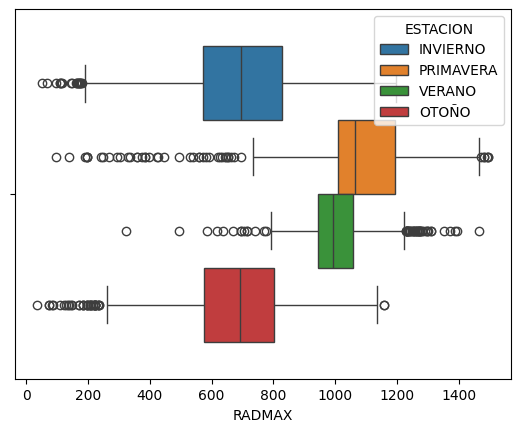

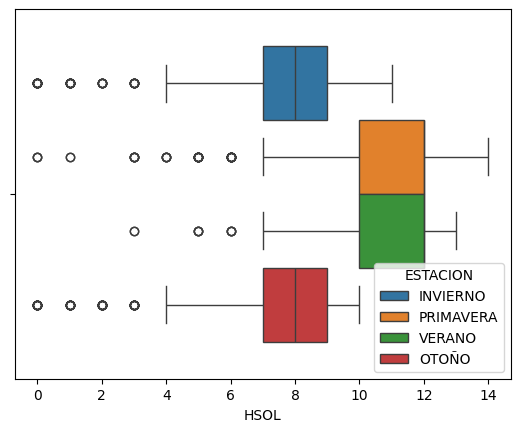

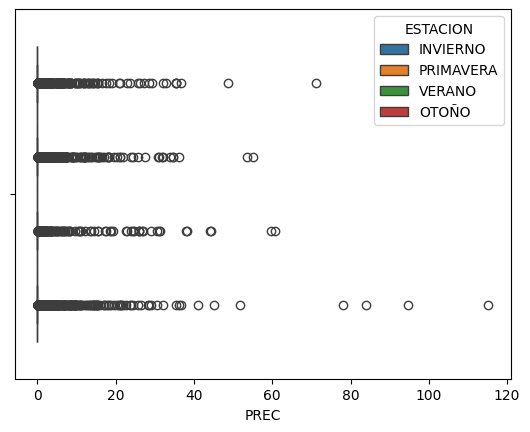

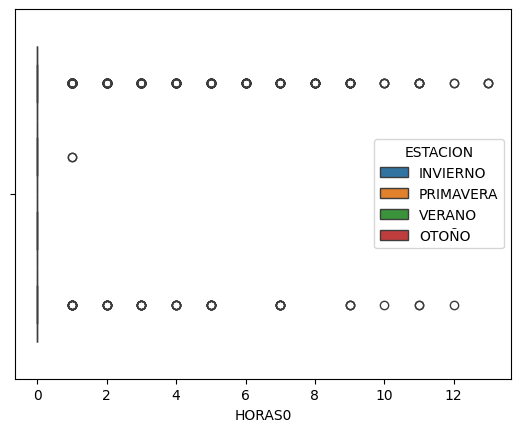

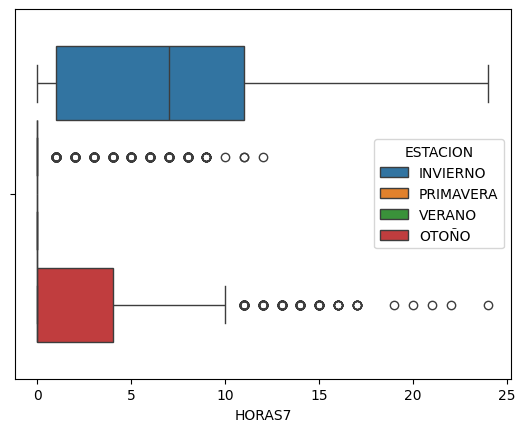

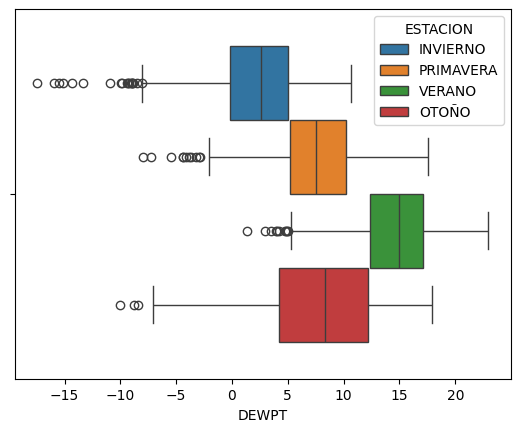

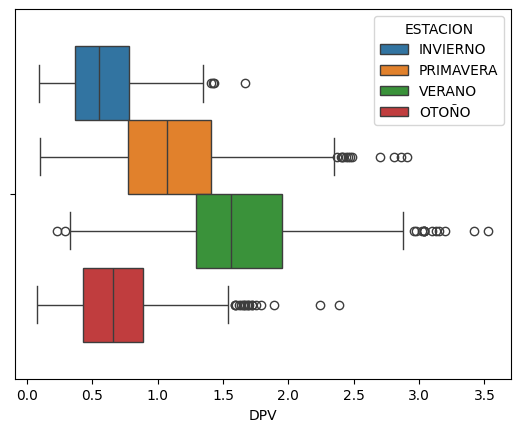

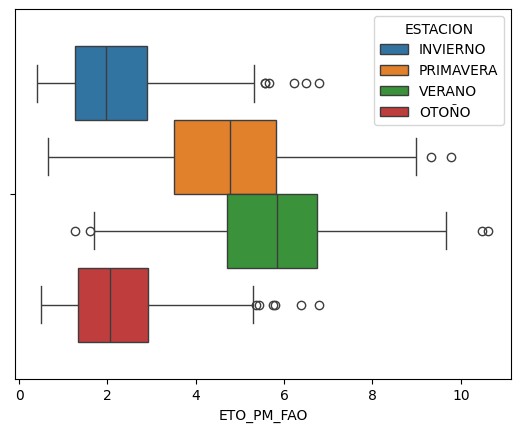

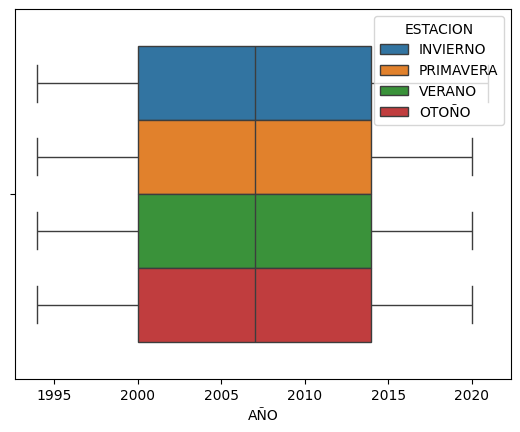

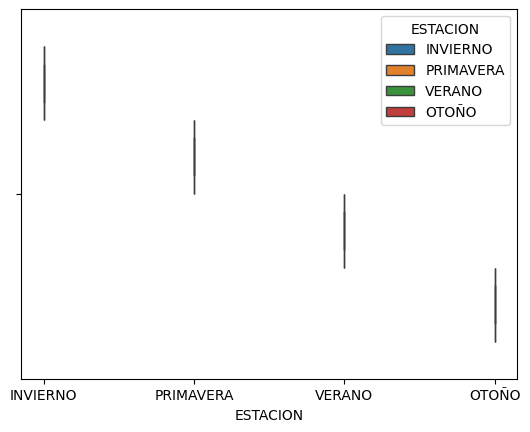

In [40]:
for variable in dataset:
    if ((variable != 'FECHA') and (variable != 'CODEST')):
        sns.boxplot(data=dataset, x=variable, hue='ESTACION')
        plt.show()

### DPV-TMAX

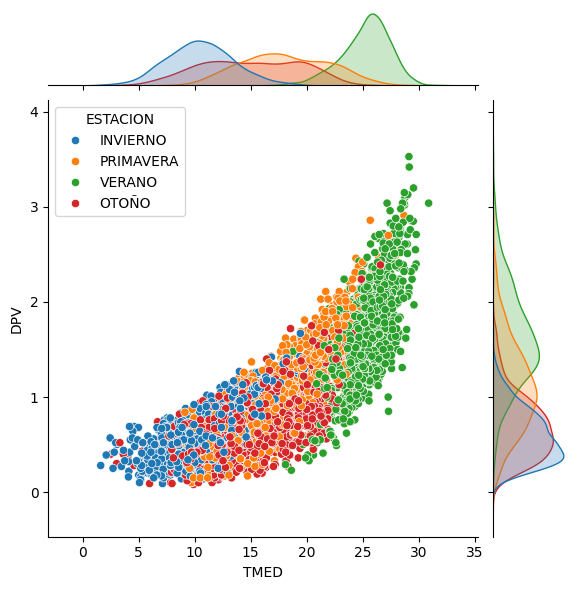

In [41]:
sns.jointplot(data=dataset, x='TMED', y='DPV', hue='ESTACION')
plt.show()

### Estacion con cosas

#### Precipitaciones

/home/user/machinelearning/env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 75.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/user/machinelearning/env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 72.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/user/machinelearning/env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 78.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/user/machinelearning/env/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/user/machinelearning/env/lib/p

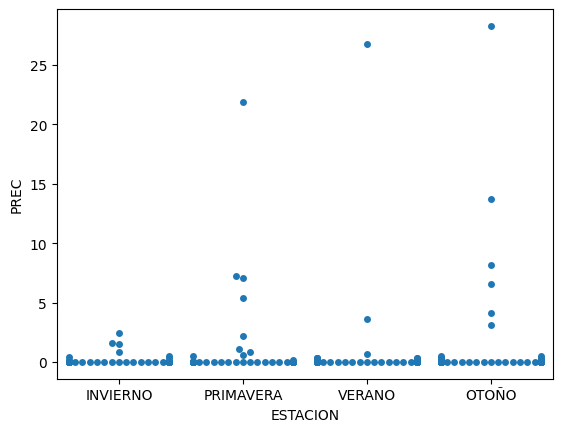

In [42]:
sns.swarmplot(data=data2, x='ESTACION', y='PREC')
plt.show()

#### Humedad

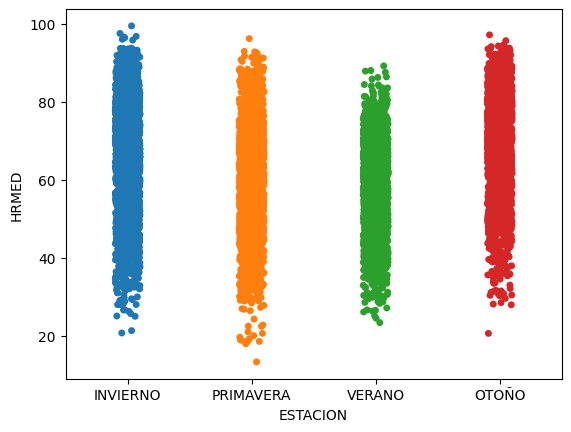

In [43]:
sns.stripplot(data=dataset, x='ESTACION', y='HRMED', hue='ESTACION')
plt.show()

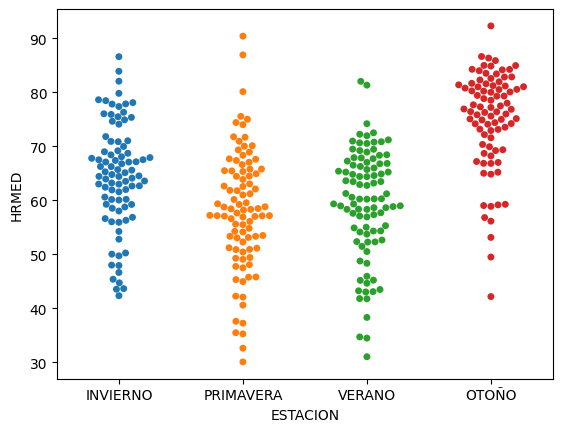

In [44]:
sns.swarmplot(data=data2, x='ESTACION', y='HRMED', hue='ESTACION')
plt.show()

#### Año

In [45]:
dataset.groupby(['AÑO', 'ESTACION']).mean(numeric_only=True).head(8)

VVMED     VVMAX     RVIENTO  DVMED       TMIN       TMAX  \
AÑO  ESTACION                                                                 
1994 INVIERNO        NaN       NaN  139.757241    NaN   3.042529  18.137931   
     OTOÑO           NaN       NaN   88.318140    NaN   9.579070  21.901163   
     PRIMAVERA       NaN       NaN  153.571304    NaN  10.793478  25.419565   
     VERANO          NaN       NaN  139.117021    NaN  18.141489  33.817021   
1995 INVIERNO   1.681341  3.973171  151.288989    NaN   5.030337  19.462921   
     OTOÑO      1.203218  3.090805  102.264270    NaN   9.342529  22.612644   
     PRIMAVERA  1.822716  4.180247  156.122609    NaN   9.860870  24.979348   
     VERANO     1.664574  3.828723  143.800851    NaN  17.576596  32.242553   

                     TMED    TMINABS    TMAXABS      HRMIN  ...   HRMAXABS  \
AÑO  ESTACION                                               ...              
1994 INVIERNO   10.183989   3.042529  18.137931  37.717241  ...  87.562069   
     OTOÑO      15.047209   9.579070  21.901163  46.491860  ...  93.022093   
     PRIMAVERA  18.132065  10.793478  25.419565  34.756522  ...  85.651087   
     VERANO     25.890532  18.141489  33.817021  34.192553  ...  86.097872   
1995 INVIERNO   11.912360   5.030337  19.462921  38.528090  ...  86.659551   
     OTOÑO      15.462414   9.342529  22.612644  43.264368  ...  91.803448   
     PRIMAVERA  17.557391   9.860870  24.979348  34.786957  ...  88.111957   
     VERANO     24.863723  17.576596  32.242553  36.069149  ...  86.042553   

                RADMED  RADMAX  HSOL      PREC    HORAS0    HORAS7  DEWPT  \
AÑO  ESTACION                                                               
1994 INVIERNO      NaN     NaN   NaN  0.089655  1.264368  7.229885    NaN   
     OTOÑO         NaN     NaN   NaN  0.779070  0.000000  2.000000    NaN   
     PRIMAVERA     NaN     NaN   NaN  0.511957  0.000000  0.804348    NaN   
     VERANO        NaN     NaN   NaN  0.357447  0.000000  0.000000    NaN   
1995 INVIERNO      NaN     NaN   NaN  0.495506  0.561798  5.426966    NaN   
     OTOÑO         NaN     NaN   NaN  0.626437  0.126437  2.172414    NaN   
     PRIMAVERA     NaN     NaN   NaN  0.215217  0.000000  1.326087    NaN   
     VERANO        NaN     NaN   NaN  0.123404  0.000000  0.000000    NaN   

                DPV  ETO_PM_FAO  
AÑO  ESTACION                    
1994 INVIERNO   NaN    2.928228  
     OTOÑO      NaN    2.928228  
     PRIMAVERA  NaN    2.928228  
     VERANO     NaN    2.928228  
1995 INVIERNO   NaN    2.928228  
     OTOÑO      NaN    2.928228  
     PRIMAVERA  NaN    2.928228  
     VERANO     NaN    2.928228  

[8 rows x 23 columns]

In [46]:
dataset.groupby(['AÑO', 'ESTACION']).agg(['min', 'max'])

CODEST            FECHA            VVMED        VVMAX         \
                  min   max        min        max   min   max    min    max   
AÑO  ESTACION                                                                 
1994 INVIERNO    AL41  AL41 1994-01-01 1994-12-31   NaN   NaN    NaN    NaN   
     OTOÑO       AL41  AL41 1994-09-23 1994-12-21   NaN   NaN    NaN    NaN   
     PRIMAVERA   AL41  AL41 1994-03-21 1994-06-20   NaN   NaN    NaN    NaN   
     VERANO      AL41  AL41 1994-06-21 1994-09-22   NaN   NaN    NaN    NaN   
1995 INVIERNO    AL41  AL41 1995-01-01 1995-12-31  0.49  4.25  1.400   8.80   
...               ...   ...        ...        ...   ...   ...    ...    ...   
2020 INVIERNO    AL41  AL41 2020-01-01 2020-12-31  0.59  5.56  2.999  16.76   
     OTOÑO       AL41  AL41 2020-09-23 2020-12-21  0.86  4.88  3.920  14.50   
     PRIMAVERA   AL41  AL41 2020-03-21 2020-06-20  0.67  4.08  3.685  12.47   
     VERANO      AL41  AL41 2020-06-21 2020-09-22  1.14  3.48  6.115  11.82   
2021 INVIERNO    AL41  AL41 2021-01-01 2021-02-09  0.74  6.87  2.940  23.68   

               RVIENTO          ... HORAS0       HORAS7       DEWPT         \
                   min     max  ...    min   max    min   max   min    max   
AÑO  ESTACION                   ...                                          
1994 INVIERNO    38.52  447.84  ...    0.0  13.0    0.0  17.0   NaN    NaN   
     OTOÑO       31.76  263.88  ...    0.0   0.0    0.0  13.0   NaN    NaN   
     PRIMAVERA   76.68  342.00  ...    0.0   0.0    0.0   9.0   NaN    NaN   
     VERANO      73.08  278.28  ...    0.0   0.0    0.0   0.0   NaN    NaN   
1995 INVIERNO    42.48  459.72  ...    0.0  10.0    0.0  16.0   NaN    NaN   
...                ...     ...  ...    ...   ...    ...   ...   ...    ...   
2020 INVIERNO    51.02  479.98  ...    0.0   7.0    0.0  18.0 -8.48  10.66   
     OTOÑO       73.96  421.86  ...    0.0   0.0    0.0  13.0 -3.38  14.58   
     PRIMAVERA   57.47  352.31  ...    0.0   0.0    0.0   7.0  4.61  15.08   
     VERANO      98.86  300.70  ...    0.0   0.0    0.0   0.0  5.63  19.73   
2021 INVIERNO    64.23  593.49  ...    0.0   8.0    0.0  24.0 -9.42   8.42   

                 DPV       ETO_PM_FAO            
                 min   max        min       max  
AÑO  ESTACION                                    
1994 INVIERNO    NaN   NaN   2.928228  2.928228  
     OTOÑO       NaN   NaN   2.928228  2.928228  
     PRIMAVERA   NaN   NaN   2.928228  2.928228  
     VERANO      NaN   NaN   2.928228  2.928228  
1995 INVIERNO    NaN   NaN   2.928228  2.928228  
...              ...   ...        ...       ...  
2020 INVIERNO   0.17  1.41   0.731649  6.230993  
     OTOÑO      0.26  2.39   0.940644  6.800773  
     PRIMAVERA  0.15  2.14   1.014286  7.983738  
     VERANO     0.54  2.79   2.666027  7.796424  
2021 INVIERNO   0.10  1.67   0.678985  4.709458  

[109 rows x 50 columns]

### ETO_PM_FAO

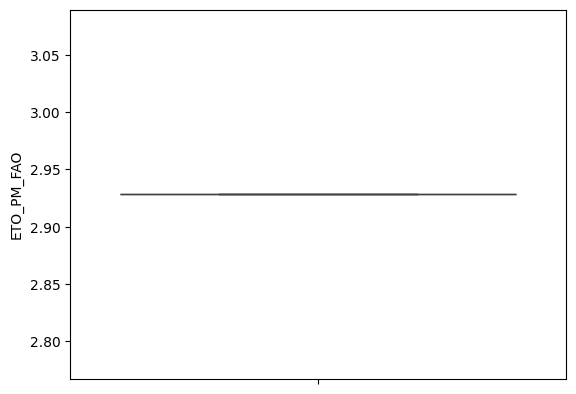

In [47]:
sns.boxplot(data=data2, y='ETO_PM_FAO')
plt.show()

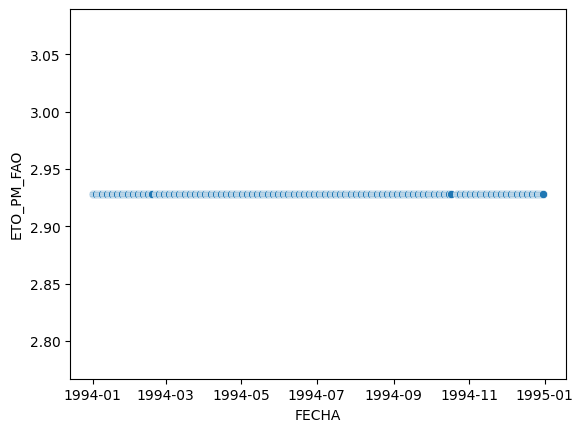

In [48]:
sns.scatterplot(data=data2, x='FECHA', y='ETO_PM_FAO')
plt.show()

In [49]:
dataset.tail(2)

CODEST      FECHA  VVMED  VVMAX  RVIENTO   DVMED   TMIN   TMAX   TMED  \
9870   AL41 2021-02-08   3.84  12.54   332.07  218.00  10.41  18.07  14.03   
9871   AL41 2021-02-09   3.05   8.70   263.77  204.08  10.30  17.10  14.09   

      TMINABS  ...  RADMAX  HSOL  PREC  HORAS0  HORAS7  DEWPT   DPV  \
9870     9.56  ...   854.0   8.0   0.0     0.0     0.0   0.99  0.96   
9871     9.49  ...   396.0   7.0   0.0     0.0     0.0   2.53  0.88   

      ETO_PM_FAO   AÑO  ESTACION  
9870    3.683019  2021  INVIERNO  
9871    2.908153  2021  INVIERNO  

[2 rows x 27 columns]

## Graficar solo una parte del DataSet

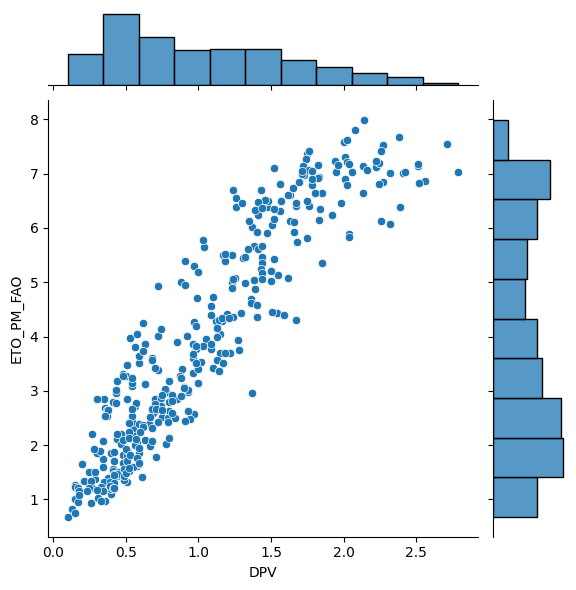

In [50]:
miniData = dataset.loc[9500:,:]
sns.jointplot(data=miniData, x='DPV', y='ETO_PM_FAO')
plt.show()

### Solo la parte donde los datos están completos

In [51]:
datos_correctos = dataset[dataset['AÑO'] > 2010]
datos_correctos.shape

(3684, 27)

Vemos que aún eliminando los nulos seguimos teniendo los mismos, por lo que ya no había nulos. Esta parte del DataSet está "limpia"

In [52]:
datos_correctos.dropna().shape

(3684, 27)

In [53]:
datos_correctos.describe()

FECHA        VVMED        VVMAX      RVIENTO  \
count                           3684  3684.000000  3684.000000  3684.000000   
mean   2016-01-20 02:25:24.429967616     2.160942     9.169069   186.697875   
min              2011-01-01 00:00:00     0.460000     2.352000    39.430000   
25%              2013-07-12 18:00:00     1.577500     7.546000   136.090000   
50%              2016-01-19 12:00:00     2.120000     9.230000   183.365000   
75%              2018-07-28 06:00:00     2.642500    10.680000   228.477500   
max              2021-02-09 00:00:00     7.010000    23.680000   605.390000   
std                              NaN     0.827962     2.573646    71.522197   

             DVMED         TMIN         TMAX         TMED      TMINABS  \
count  3684.000000  3684.000000  3684.000000  3684.000000  3684.000000   
mean    151.006205    10.620542    23.806645    17.148735     9.728626   
min       0.030000    -5.322000     3.530000     1.620000    -6.097000   
25%      95.767500     5.484750    18.200000    11.650000     4.508750   
50%     157.900000    10.600000    23.485000    16.830000     9.775000   
75%     186.655000    15.850000    29.592500    22.830000    15.040000   
max     359.990000    25.200000    42.970000    30.870000    24.890000   
std      83.594751     6.321391     6.789943     6.388566     6.424624   

           TMAXABS  ...       RADMED       RADMAX         HSOL         PREC  \
count  3684.000000  ...  3684.000000  3684.000000  3684.000000  3684.000000   
mean     24.476710  ...   211.736621   873.345953     9.519815     0.705052   
min       4.403000  ...     4.430000    36.000000     0.000000     0.000000   
25%      18.790000  ...   130.357500   689.100000     8.000000     0.000000   
50%      24.125000  ...   207.865000   915.000000    10.000000     0.000000   
75%      30.357500  ...   297.375000  1033.000000    12.000000     0.000000   
max      44.140000  ...   376.250000  1496.000000    14.000000   115.200000   
std       6.894399  ...    93.707794   241.317975     2.331218     4.144347   

            HORAS0       HORAS7        DEWPT          DPV   ETO_PM_FAO  \
count  3684.000000  3684.000000  3684.000000  3684.000000  3684.000000   
mean      0.151737     2.493214     7.973295     1.016786     4.050789   
min       0.000000     0.000000   -17.430000     0.100000     0.619703   
25%       0.000000     0.000000     3.800000     0.550000     2.155920   
50%       0.000000     0.000000     7.900000     0.900000     3.791344   
75%       0.000000     3.000000    12.712500     1.390000     5.929903   
max      12.000000    24.000000    22.960000     3.530000    10.486281   
std       0.919541     4.444451     6.078470     0.586494     2.164094   

               AÑO  
count  3684.000000  
mean   2015.558089  
min    2011.000000  
25%    2013.000000  
50%    2016.000000  
75%    2018.000000  
max    2021.000000  
std       2.910959  

[8 rows x 25 columns]

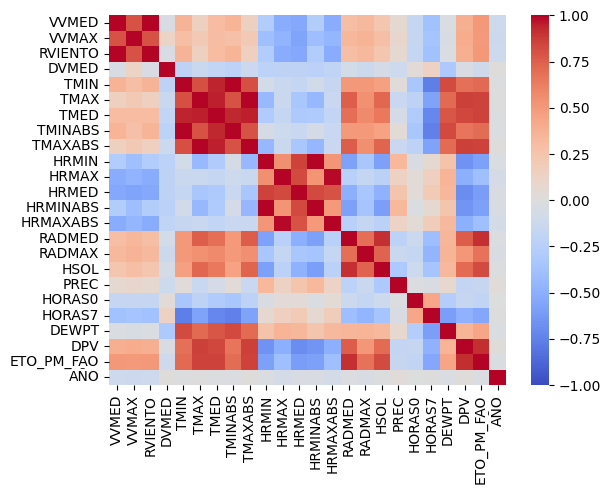

In [54]:
sns.heatmap(datos_correctos.corr(numeric_only=True), vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

# Crear DataSet con una fila por día

In [55]:
dataPrueba = pd.read_csv('/home/user/machinelearning/imida/data/AL41.csv', sep=';')
fechas = []
for x in dataPrueba['FECHA']:
    fechas.append(datetime.datetime.strptime(x, '%d/%m/%Y').date())
dataPrueba['FECHA_2'] = fechas

In [56]:
dataPrueba['FECHA_2']

0       1994-01-01
1       1994-01-02
2       1994-01-03
3       1994-01-04
4       1994-01-05
           ...    
9867    2021-02-05
9868    2021-02-06
9869    2021-02-07
9870    2021-02-08
9871    2021-02-09
Name: FECHA_2, Length: 9872, dtype: object

In [57]:
def linea_null(fecha):
    return "AL41," + fecha + ",,,,,,,,,,,,,,,,,,,,,\n"
def linea_completa(data):
    str = "AL41," + data.iloc[:,1:2].values[0][0] + ","
    for x in range(2,25):
        print(data.iloc[:,x:x+1].values[0][0])
        '''
        if data.iloc[:,x:x+1].values[0][0].isnull():
            str+=","
        else:
            str+=str(data.iloc[:,x:x+1].values[0][0]) + ","
        '''
    str+="\n"
    return str

In [58]:
f = open("/home/user/machinelearning/imida/data/AL41_2.csv", "w")
for variable in dataPrueba.columns:
    if variable != 'FECHA_2':
        f.write(variable + ",")
    else:
        f.write(variable + "\n")

In [59]:
f.write(linea_completa(dataPrueba[dataPrueba['FECHA'] == '01/01/1994']))

nan
nan
121,68
nan
5,9
19,1
12,87
5,9
19,1
39,3
86,7
63,48
39,3
86,7
nan
nan
nan
0
0.0
3.0
nan
nan
2,928228186


17

In [60]:
dataPrueba[dataPrueba['FECHA'] == '01/01/1994'].iloc[:,1:2].values[0][0]

'01/01/1994'

In [61]:
year = 1994
while (year <= 2021):
    for month in range(1,13):
        if month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:
            for day in range(1,32):
                if (day<10):
                        strday = "0"+str(day)
                else:
                    strday = str(day)
                if (month<10):
                    strmonth = "0"+str(month)
                else:
                    strmonth = str(month)
                print(strday+"/"+strmonth+"/"+str(year))
        elif month == 2:
            if year % 4:
                for day in range (1,30):
                    if (day<10):
                        strday = "0"+str(day)
                    else:
                        strday = str(day)
                    if (month<10):
                        strmonth = "0"+str(month)
                    else:
                        strmonth = str(month)
                    print(strday+"/"+strmonth+"/"+str(year))
            else:
                for day in range (1,29):
                    if (day<10):
                        strday = "0"+str(day)
                    else:
                        strday = str(day)
                    if (month<10):
                        strmonth = "0"+str(month)
                    else:
                        strmonth = str(month)
                    print(strday+"/"+strmonth+"/"+str(year))
        else:
            for day in range(1,31):
                if (day<10):
                    strday = "0"+str(day)
                else:
                    strday = str(day)
                if (month<10):
                    strmonth = "0"+str(month)
                else:
                    strmonth = str(month)
                print(strday+"/"+strmonth+"/"+str(year))
    year+=1 
    

01/01/1994
02/01/1994
03/01/1994
04/01/1994
05/01/1994
06/01/1994
07/01/1994
08/01/1994
09/01/1994
10/01/1994
11/01/1994
12/01/1994
13/01/1994
14/01/1994
15/01/1994
16/01/1994
17/01/1994
18/01/1994
19/01/1994
20/01/1994
21/01/1994
22/01/1994
23/01/1994
24/01/1994
25/01/1994
26/01/1994
27/01/1994
28/01/1994
29/01/1994
30/01/1994
31/01/1994
01/02/1994
02/02/1994
03/02/1994
04/02/1994
05/02/1994
06/02/1994
07/02/1994
08/02/1994
09/02/1994
10/02/1994
11/02/1994
12/02/1994
13/02/1994
14/02/1994
15/02/1994
16/02/1994
17/02/1994
18/02/1994
19/02/1994
20/02/1994
21/02/1994
22/02/1994
23/02/1994
24/02/1994
25/02/1994
26/02/1994
27/02/1994
28/02/1994
29/02/1994
01/03/1994
02/03/1994
03/03/1994
04/03/1994
05/03/1994
06/03/1994
07/03/1994
08/03/1994
09/03/1994
10/03/1994
11/03/1994
12/03/1994
13/03/1994
14/03/1994
15/03/1994
16/03/1994
17/03/1994
18/03/1994
19/03/1994
20/03/1994
21/03/1994
22/03/1994
23/03/1994
24/03/1994
25/03/1994
26/03/1994
27/03/1994
28/03/1994
29/03/1994
30/03/1994
31/03/1994